__Uploading Tensorflow and Keras__

In [90]:
from google.colab import files
uploaded = files.upload()

Saving Project2_training.csv to Project2_training (1).csv


In [109]:
import keras as keras

__Importing Packages__

In [110]:
import os
os.getcwd()

'/content'

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

__Reading CSV and Normalizing Variables__

In [113]:
df = pd.read_csv('Project2_training.csv')

In [114]:
# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [115]:
df.head()

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price,Call Price
0,1.467892,1,0,0.992653,0.028574,100,0.747693
1,1.258188,1,0,0.995702,0.026482,100,0.580628
2,0.600640,1,0,0.984955,0.029314,100,0.142689
3,1.082254,1,0,0.048974,0.029928,100,0.111967
4,0.992677,1,0,0.120462,0.020081,100,0.053918


## Part A: Question 1

### Shallow Neural Network

Epoch 1/100
38/38 - 1s - loss: 0.1289 - val_loss: 0.0536 - 1s/epoch - 27ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0518 - val_loss: 0.0486 - 130ms/epoch - 3ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0455 - val_loss: 0.0411 - 166ms/epoch - 4ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0365 - val_loss: 0.0307 - 160ms/epoch - 4ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0251 - val_loss: 0.0190 - 182ms/epoch - 5ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0143 - val_loss: 0.0100 - 146ms/epoch - 4ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0075 - val_loss: 0.0053 - 193ms/epoch - 5ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0043 - val_loss: 0.0035 - 138ms/epoch - 4ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0031 - val_loss: 0.0028 - 105ms/epoch - 3ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0025 - val_loss: 0.0023 - 110ms/epoch - 3ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0021 - val_loss: 0.0019 - 104ms/epoch - 3ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0018 - val_loss: 0.0017 - 107ms/epoch - 3ms/step
Epoch 13/100
38

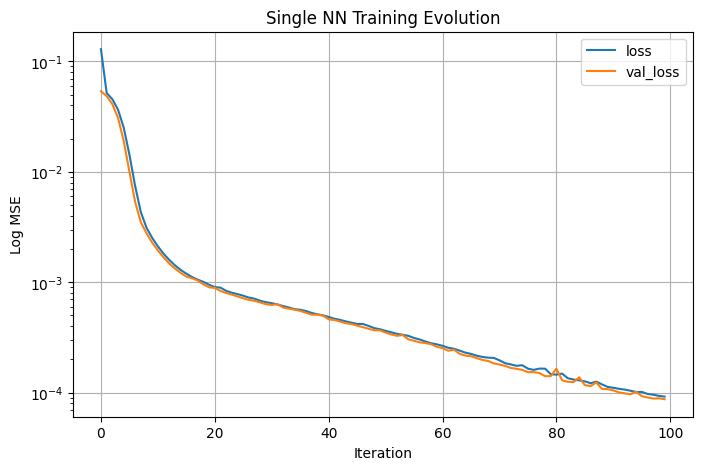

In [116]:
# for this NN we will define it with 300 neurons
nodes = 300
# initialize the mode as Sequential class - the next steps we will add layers to it
model = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron
model.add(Dense(1))
# we will use our customized activation function
model.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

__Assessing Accuracy of Shallow Neural Network__

In [117]:
def CheckAccuracy_dict(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)
    print(
    "Mean Squared Error:      ", stats['mse'])

    stats['rmse'] = np.sqrt(stats['mse'])
    print(
    "Root Mean Squared Error: ", stats['rmse'])

    stats['mae'] = np.mean(abs(stats['diff']))
    print(
    "Mean Absolute Error:     ", stats['mae'])

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)
    print(
    "Mean Percent Error:      ", stats['mpe'])

    return stats


def CheckAccuracy_plots(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    # plots
    # mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

19/19 [==============================] - 0s 2ms/step


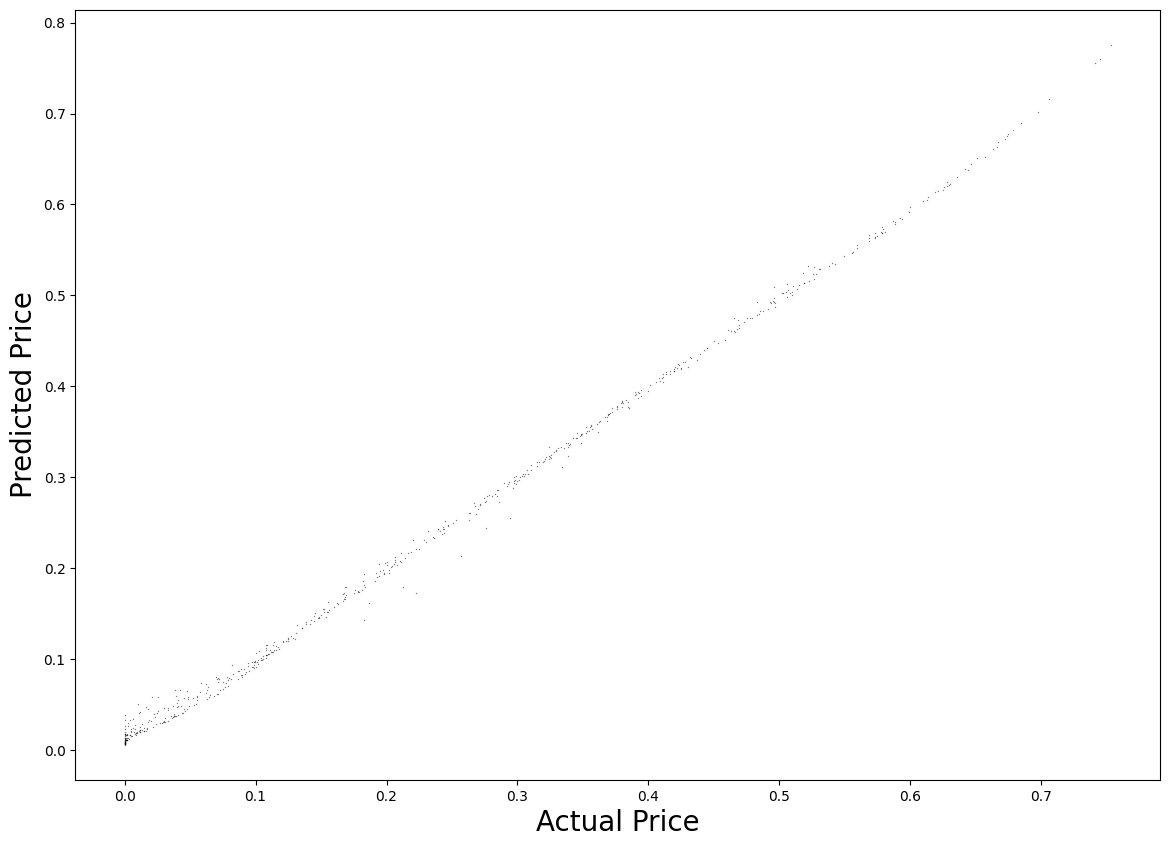

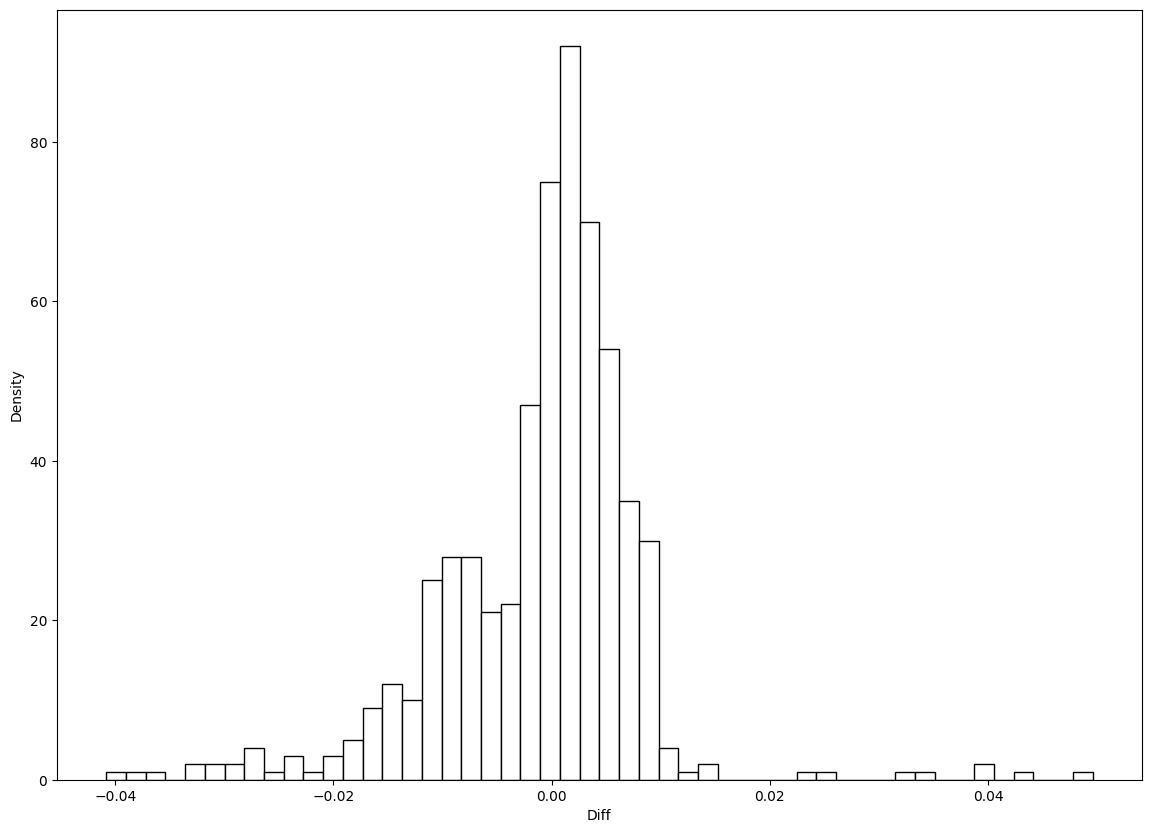

Mean Squared Error:       8.719606947431745e-05
Root Mean Squared Error:  0.009337883565043925
Mean Absolute Error:      0.006275882071425126
Mean Percent Error:       0.03860425537469786


In [118]:
y1_test_hat = model.predict(X_test)

y1_test_hat = np.squeeze(y1_test_hat)


CheckAccuracy_plots(y_test, y1_test_hat)
s = CheckAccuracy_dict(y_test, y1_test_hat)


In [119]:
shallow_network = CheckAccuracy_dict(y_test, y1_test_hat)
shallow_network.pop('diff')
shallow_network = {'Shallow Neural Network': shallow_network}

Mean Squared Error:       8.719606947431745e-05
Root Mean Squared Error:  0.009337883565043925
Mean Absolute Error:      0.006275882071425126
Mean Percent Error:       0.03860425537469786


### Deep Neural Network

In [120]:
# function for creating neural network structure with different number of layers
def NeuralNetwork(layers, nodes_num, act, opt, epoch_nums):
    # initialize our new model as sequential class
    model = Sequential()

    # add the first layer of nodes_num neurons - for the first layer you must declare the number of features through input_dim arguments
    model.add(Dense(nodes_num, activation= act, input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

    for i in range(layers - 1):
        model.add(Dense(nodes_num, activation = act))

    # output layer is the same as the single NN
    model.add(Dense(1))
    model.add(Activation(custom_activation))

    # compile and fit the model
    model.compile(loss='mse', optimizer=opt) # optimizer = 'rmsprop', 'sgd', 'adam'
    history = model.fit(X_train, y_train, batch_size=512, epochs=epoch_nums, validation_split=0.1, verbose=2,
                              validation_data=(X_test, y_test))
    print()
    print(model.summary())

    pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
    plt.title('DNN Training Evolution')
    plt.ylabel('Log MSE')
    plt.xlabel('Iteration')
    plt.grid(True)

    return model

__Assessing Accuracy of Deep Neural Network (with 3 layers of 100 neurons each)__

Epoch 1/100
5/5 - 1s - loss: 0.5338 - val_loss: 0.3219 - 961ms/epoch - 192ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2439 - val_loss: 0.1489 - 64ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1123 - val_loss: 0.0722 - 56ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0611 - val_loss: 0.0513 - 50ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0517 - val_loss: 0.0515 - 67ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0535 - val_loss: 0.0535 - 55ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0549 - val_loss: 0.0530 - 67ms/epoch - 13ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0534 - val_loss: 0.0504 - 50ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0503 - val_loss: 0.0468 - 50ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0466 - val_loss: 0.0435 - 51ms/epoch - 10ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0431 - val_loss: 0.0403 - 49ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0398 - val_loss: 0.0370 - 70ms/epoch - 14ms/step
Epoch 13/100
5/5 - 0s - loss: 0.036

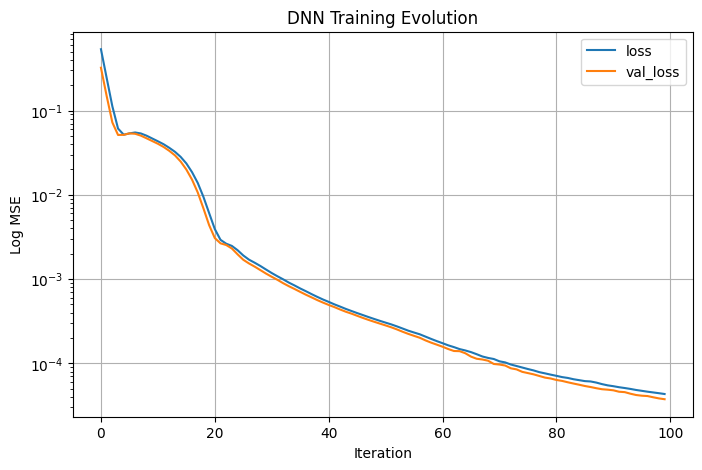

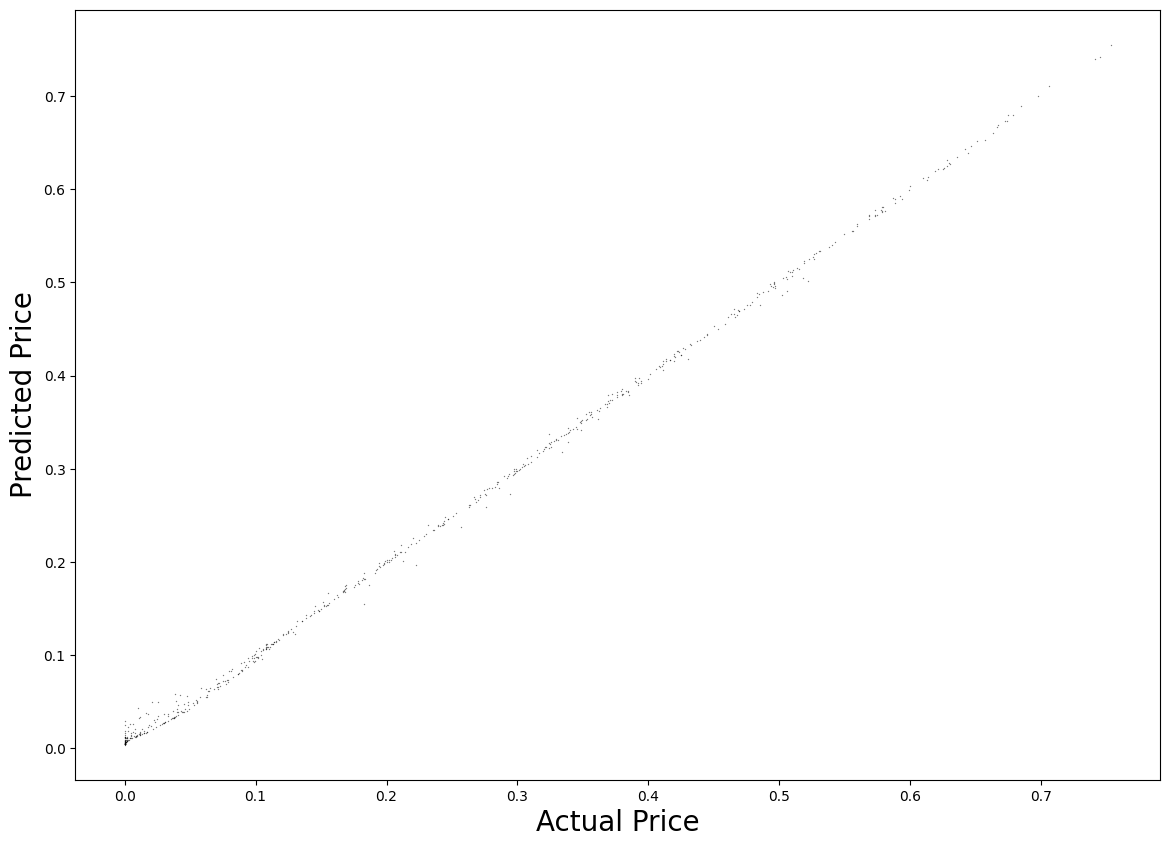

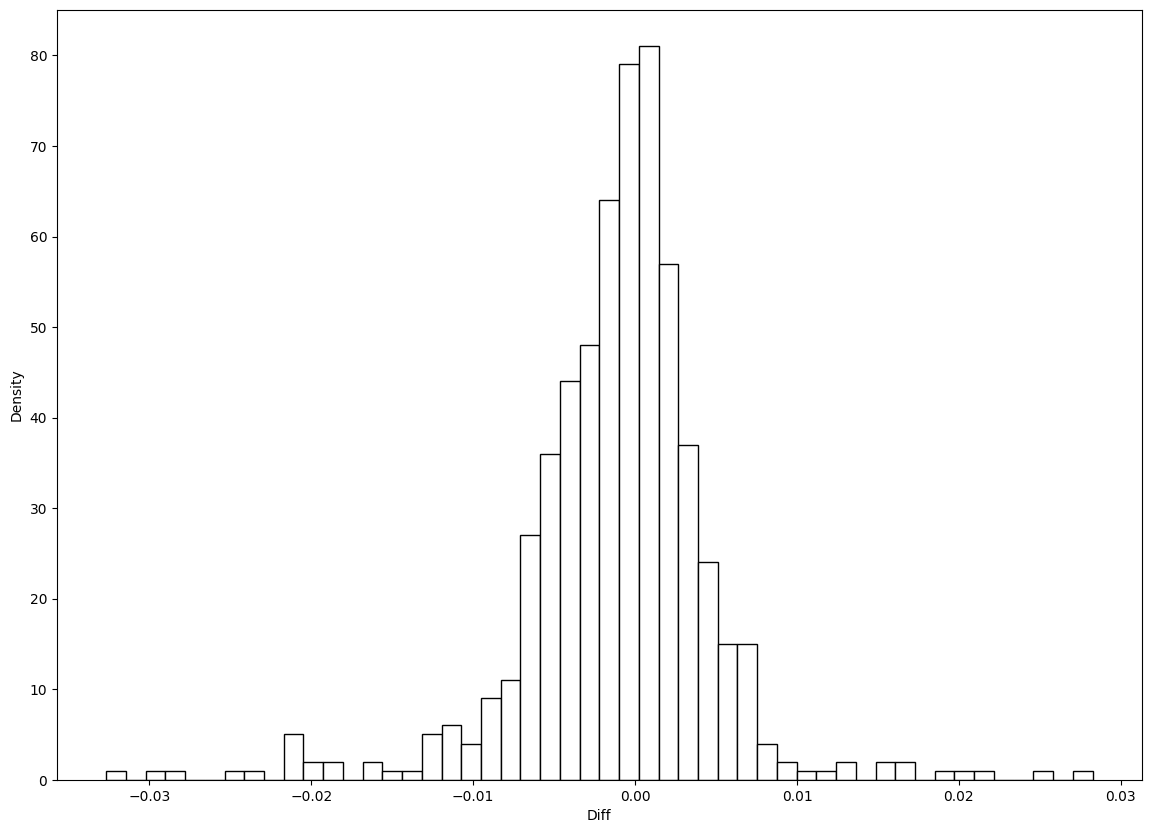

Mean Squared Error:       3.75139654121528e-05
Root Mean Squared Error:  0.0061248645219427345
Mean Absolute Error:      0.0040029005298322295
Mean Percent Error:       0.02532113754615999


In [121]:
y2_test_hat = NeuralNetwork(3, 100, 'relu', 'adam', 100).predict(X_test)

y2_test_hat = np.squeeze(y2_test_hat)

CheckAccuracy_plots(y_test, y2_test_hat)
s = CheckAccuracy_dict(y_test, y2_test_hat)

In [122]:
deep_3_100_relu = CheckAccuracy_dict(y_test, y2_test_hat)
deep_3_100_relu.pop('diff')
deep_3_100_relu = {'DNN (3, 100, Relu)': deep_3_100_relu}

Mean Squared Error:       3.75139654121528e-05
Root Mean Squared Error:  0.0061248645219427345
Mean Absolute Error:      0.0040029005298322295
Mean Percent Error:       0.02532113754615999


### Deep Neural Network (with 5 layers of 60 neurons each)

__Assessing Accuracy of DNN with 5 layers of 60 neurons each__

Epoch 1/100
5/5 - 1s - loss: 0.4074 - val_loss: 0.2442 - 1s/epoch - 271ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1769 - val_loss: 0.1030 - 55ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0774 - val_loss: 0.0564 - 53ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0546 - val_loss: 0.0543 - 53ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0570 - val_loss: 0.0580 - 52ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0597 - val_loss: 0.0580 - 69ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0583 - val_loss: 0.0549 - 81ms/epoch - 16ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0545 - val_loss: 0.0508 - 66ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0504 - val_loss: 0.0481 - 68ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0477 - val_loss: 0.0468 - 69ms/epoch - 14ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0461 - val_loss: 0.0450 - 58ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0441 - val_loss: 0.0425 - 51ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0417 -

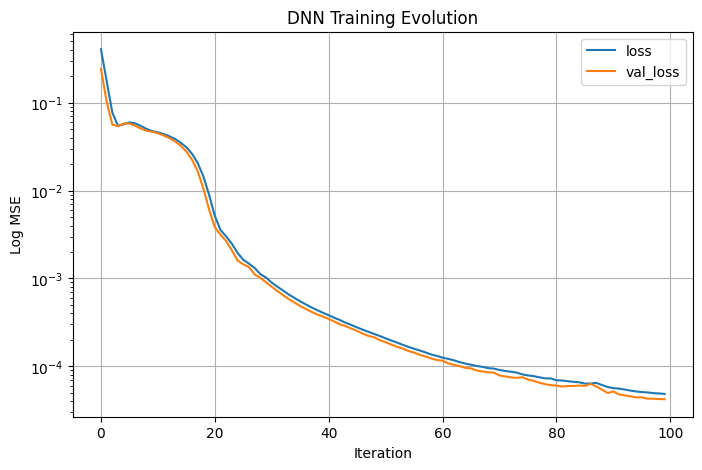

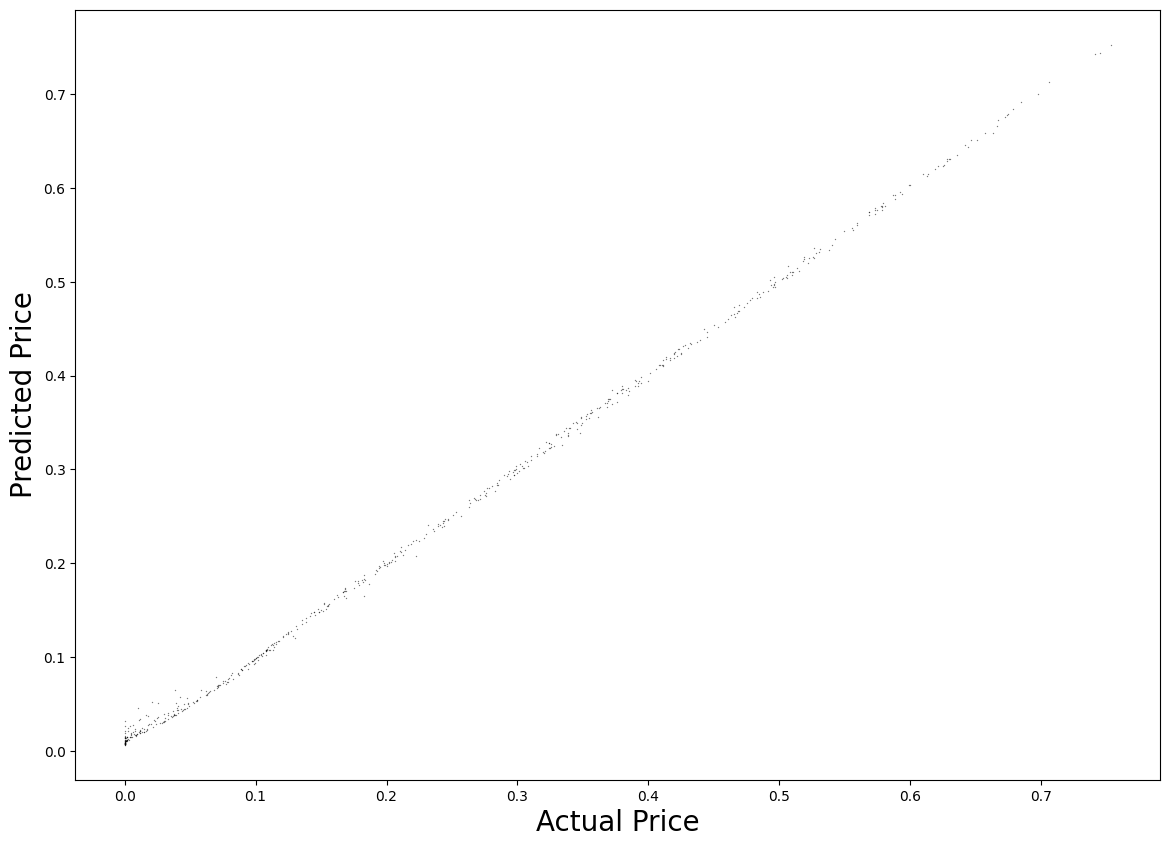

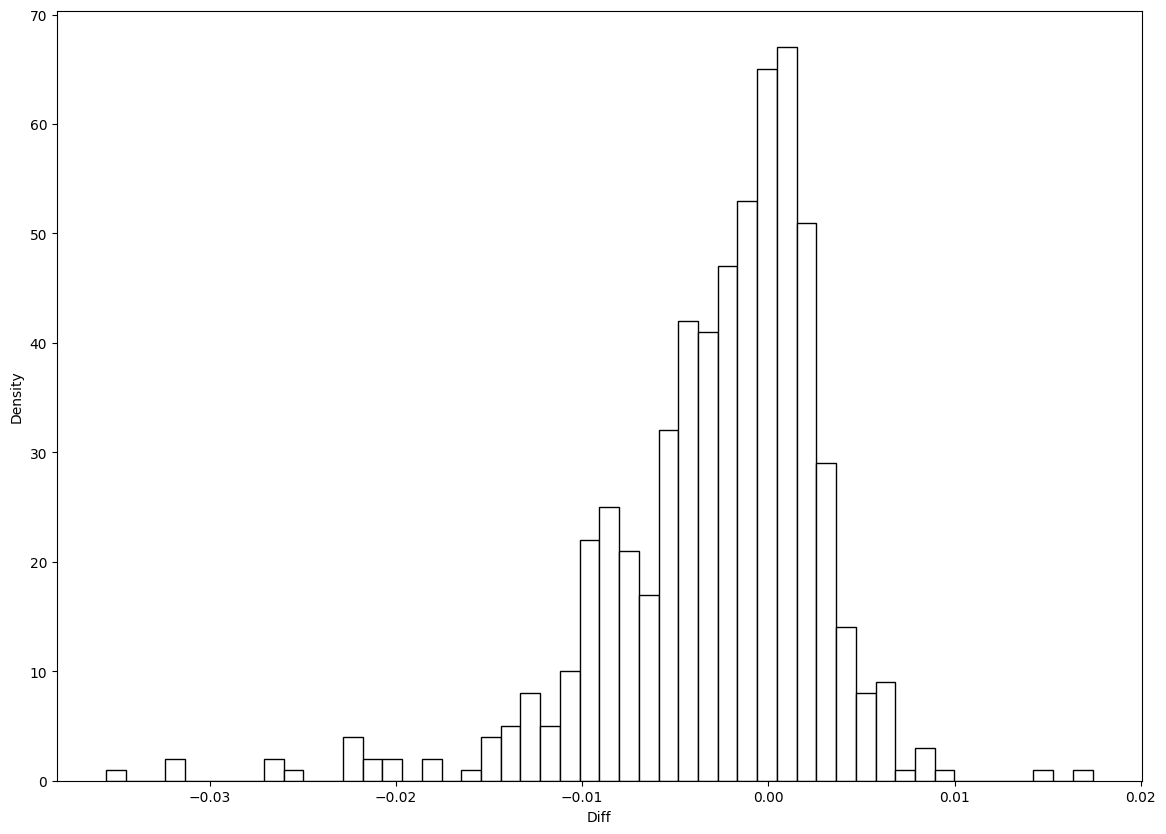

Mean Squared Error:       4.2144632076187575e-05
Root Mean Squared Error:  0.006491889715343875
Mean Absolute Error:      0.004397686386819516
Mean Percent Error:       0.02683847648022485


{'diff': array([ 3.34712207e-03, -2.46826465e-03, -4.38830731e-03,  2.64354088e-03,
        -5.89103316e-03, -4.53846791e-03, -6.01966821e-03,  6.49484959e-03,
        -3.73893707e-03, -1.89563966e-03, -6.94748279e-04, -3.89808820e-03,
        -8.34475757e-03, -6.72171214e-04, -1.20419010e-03, -7.10056908e-03,
         2.07014509e-03, -1.13222704e-02,  4.20496682e-03, -1.84205555e-03,
         3.09698312e-03, -2.67735289e-03, -9.06187765e-03,  6.17035351e-03,
         2.88529294e-03,  5.89576462e-03, -1.10351030e-03, -3.93620447e-03,
         3.43191180e-03,  1.02650036e-03,  2.69378979e-03,  2.73970389e-03,
         8.90403994e-04, -1.45660003e-03, -1.63230916e-03, -4.07816360e-03,
        -9.60534829e-03,  1.02935631e-03, -6.59829781e-03, -9.59270921e-04,
        -8.87647422e-03,  1.36989216e-03,  5.23952490e-04, -8.25965301e-03,
        -2.84727169e-03,  1.52750104e-03, -9.29876372e-03, -8.64425928e-03,
        -1.11436841e-03, -4.62204570e-03, -5.18860174e-03, -6.93120935e-03,
    

In [123]:
y3_test_hat = NeuralNetwork(5, 60, 'relu', 'adam', 100).predict(X_test)

y3_test_hat = np.squeeze(y3_test_hat)

CheckAccuracy_plots(y_test, y3_test_hat)
CheckAccuracy_dict(y_test, y3_test_hat)

In [124]:
deep_5_60_relu = CheckAccuracy_dict(y_test, y3_test_hat)
deep_5_60_relu.pop('diff')
deep_5_60_relu = {'DNN (5, 60, Relu)': deep_5_60_relu}
deep_5_60_relu

Mean Squared Error:       4.2144632076187575e-05
Root Mean Squared Error:  0.006491889715343875
Mean Absolute Error:      0.004397686386819516
Mean Percent Error:       0.02683847648022485


{'DNN (5, 60, Relu)': {'mse': 4.2144632076187575e-05,
  'rmse': 0.006491889715343875,
  'mae': 0.004397686386819516,
  'mpe': 0.02683847648022485}}

### Comparison of Key Accuracy Stats Across Neural Networks of Varying Layers

In [125]:
question1 = {**shallow_network, **deep_3_100_relu, **deep_5_60_relu}

df = pd.DataFrame.from_dict(question1)
df

,Shallow Neural Network,"DNN (3, 100, Relu)","DNN (5, 60, Relu)"
mse,0.000087,0.000038,0.000042
rmse,0.009338,0.006125,0.006492
mae,0.006276,0.004003,0.004398
mpe,0.038604,0.025321,0.026838


## Part A: Question 2

### DNN with 5 Layers of 60 Neurons Each (Activation: tanh)

Epoch 1/100
5/5 - 1s - loss: 0.4038 - val_loss: 0.0596 - 1s/epoch - 274ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0564 - val_loss: 0.0596 - 69ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0646 - val_loss: 0.0666 - 67ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0694 - val_loss: 0.0676 - 54ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0688 - val_loss: 0.0647 - 71ms/epoch - 14ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0644 - val_loss: 0.0584 - 71ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0566 - val_loss: 0.0490 - 51ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0459 - val_loss: 0.0391 - 72ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0372 - val_loss: 0.0359 - 57ms/epoch - 11ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0353 - val_loss: 0.0335 - 72ms/epoch - 14ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0296 - val_loss: 0.0250 - 73ms/epoch - 15ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0230 - val_loss: 0.0198 - 75ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0173 -

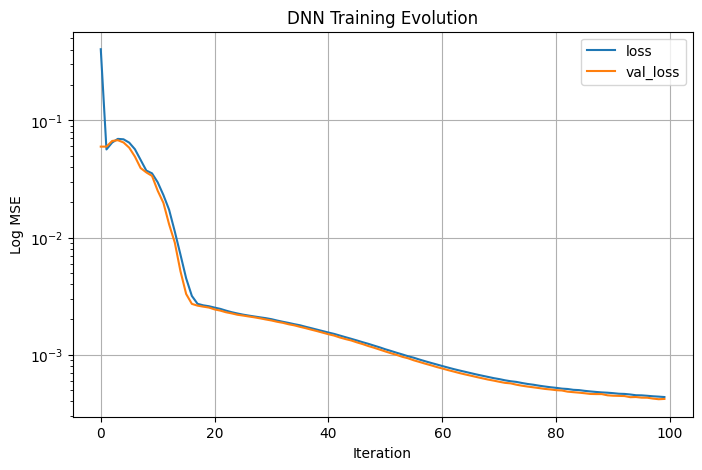

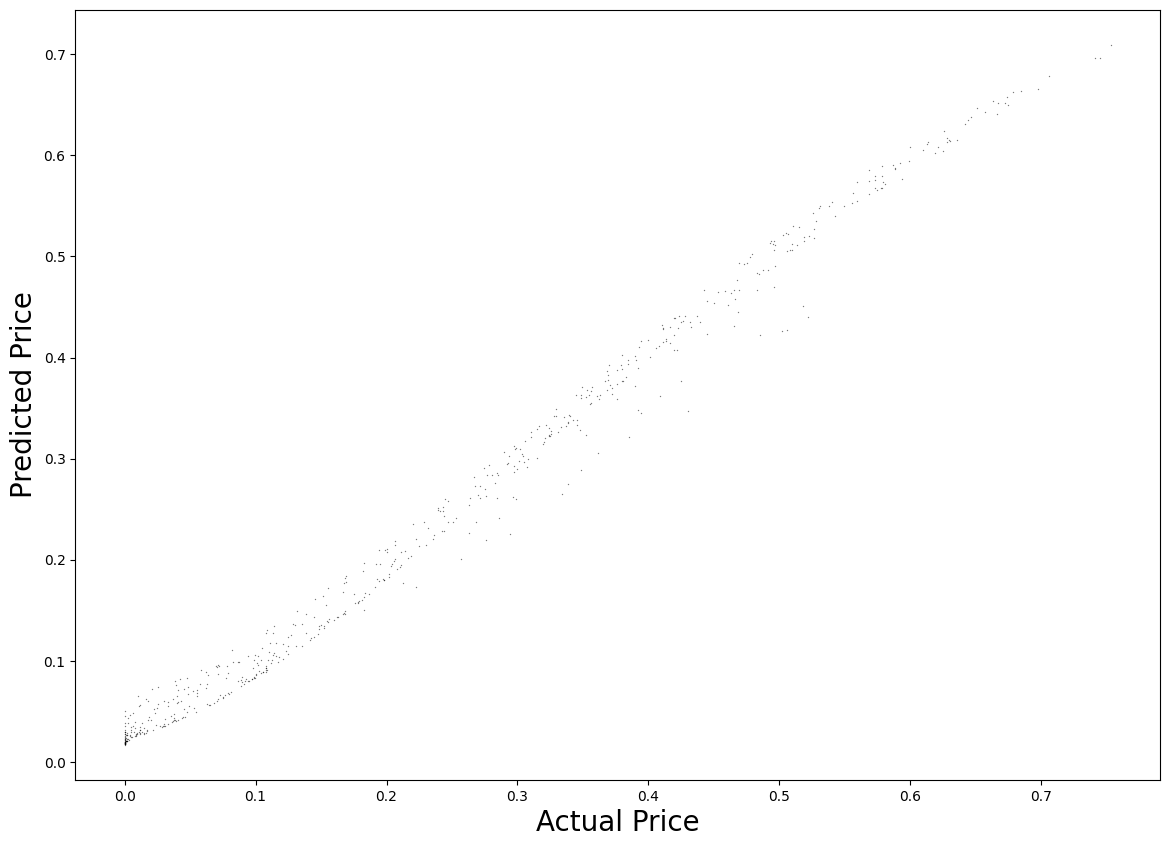

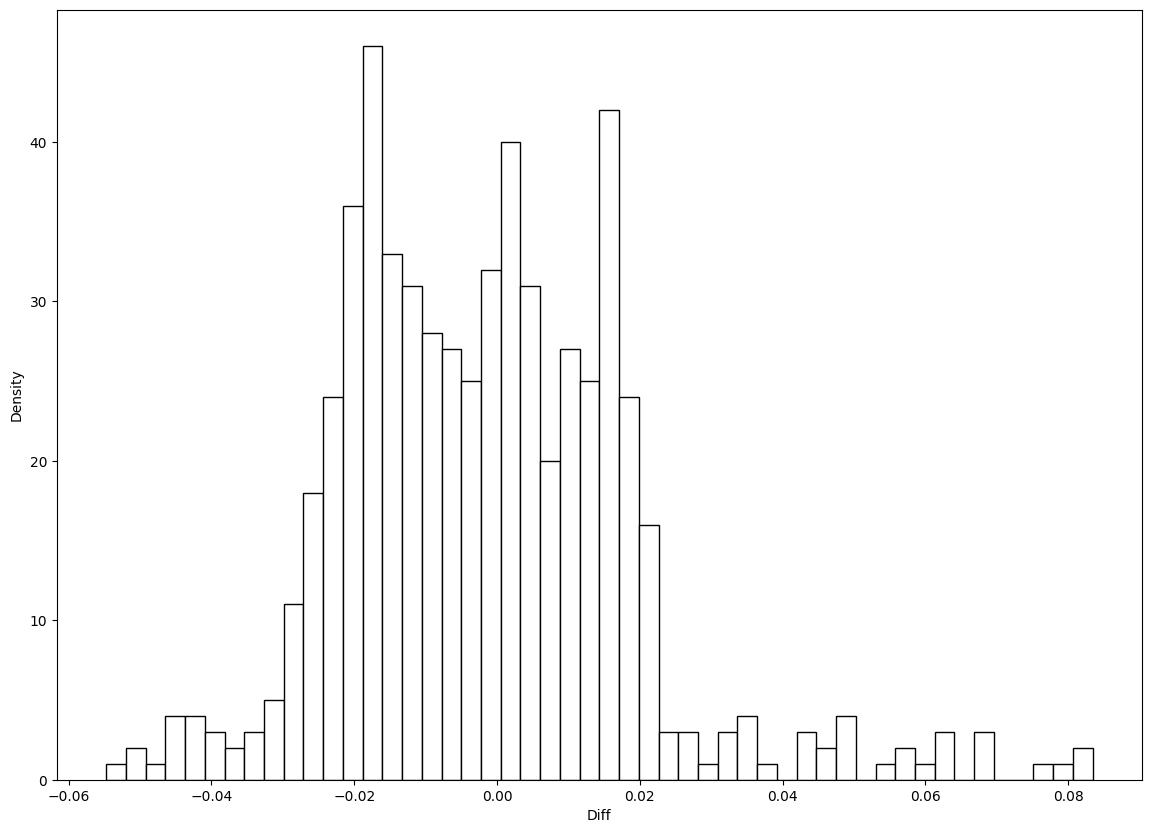

Mean Squared Error:       0.000419671412626903
Root Mean Squared Error:  0.020485883252300913
Mean Absolute Error:      0.015784504483666566
Mean Percent Error:       0.08469181085193261


In [126]:
y4_test_hat = NeuralNetwork(5, 60, 'tanh', 'adam', 100).predict(X_test)

y4_test_hat = np.squeeze(y4_test_hat)

CheckAccuracy_plots(y_test, y4_test_hat)
s = CheckAccuracy_dict(y_test, y4_test_hat)

In [127]:
deep_5_60_tanh = CheckAccuracy_dict(y_test, y4_test_hat)
deep_5_60_tanh.pop('diff')
deep_5_60_tanh = {'DNN (5, 60, tanh)': deep_5_60_tanh}
deep_5_60_tanh

Mean Squared Error:       0.000419671412626903
Root Mean Squared Error:  0.020485883252300913
Mean Absolute Error:      0.015784504483666566
Mean Percent Error:       0.08469181085193261


{'DNN (5, 60, tanh)': {'mse': 0.000419671412626903,
  'rmse': 0.020485883252300913,
  'mae': 0.015784504483666566,
  'mpe': 0.08469181085193261}}

### DNN with 5 Layers of 60 Neurons Each (Activation: sigmoid)

Epoch 1/100
5/5 - 2s - loss: 0.1691 - val_loss: 0.0668 - 2s/epoch - 330ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0504 - val_loss: 0.0401 - 126ms/epoch - 25ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0403 - val_loss: 0.0411 - 290ms/epoch - 58ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0429 - val_loss: 0.0437 - 181ms/epoch - 36ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0454 - val_loss: 0.0449 - 206ms/epoch - 41ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0460 - val_loss: 0.0446 - 334ms/epoch - 67ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0453 - val_loss: 0.0434 - 333ms/epoch - 67ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0438 - val_loss: 0.0419 - 176ms/epoch - 35ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0422 - val_loss: 0.0406 - 215ms/epoch - 43ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0409 - val_loss: 0.0398 - 181ms/epoch - 36ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0401 - val_loss: 0.0396 - 128ms/epoch - 26ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0399 - val_loss: 0.0397 - 134ms/epoch - 27ms/step
Epoch 13/100
5/5 - 0s - los

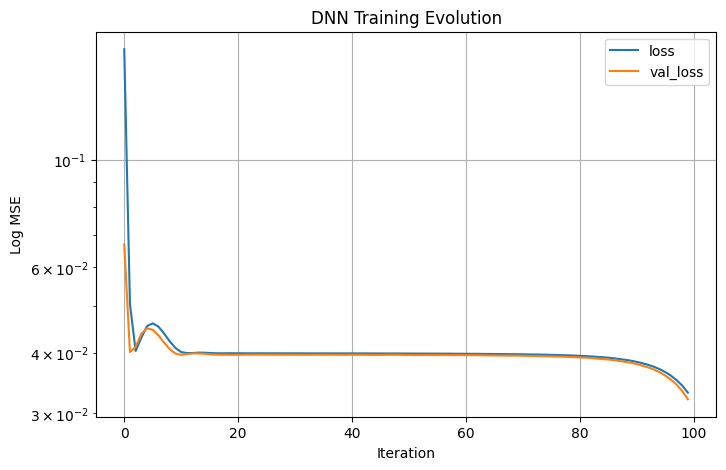

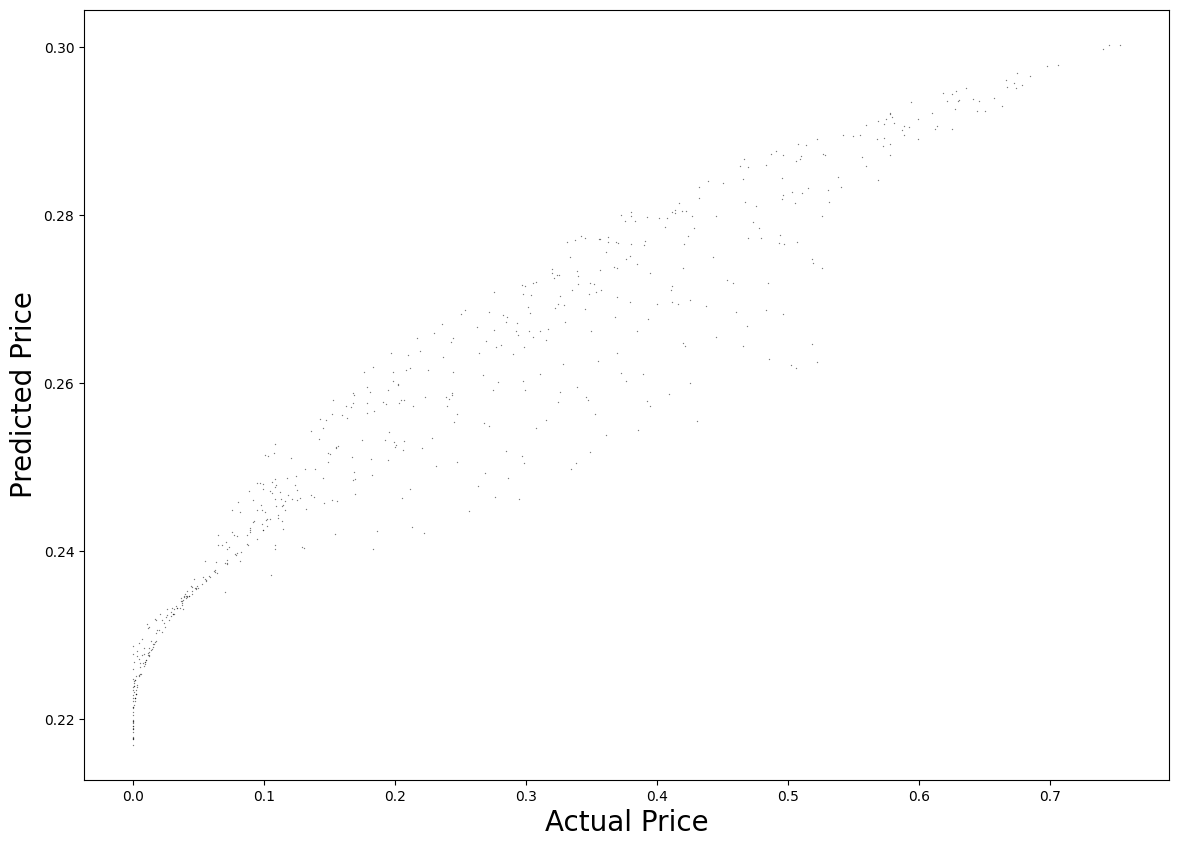

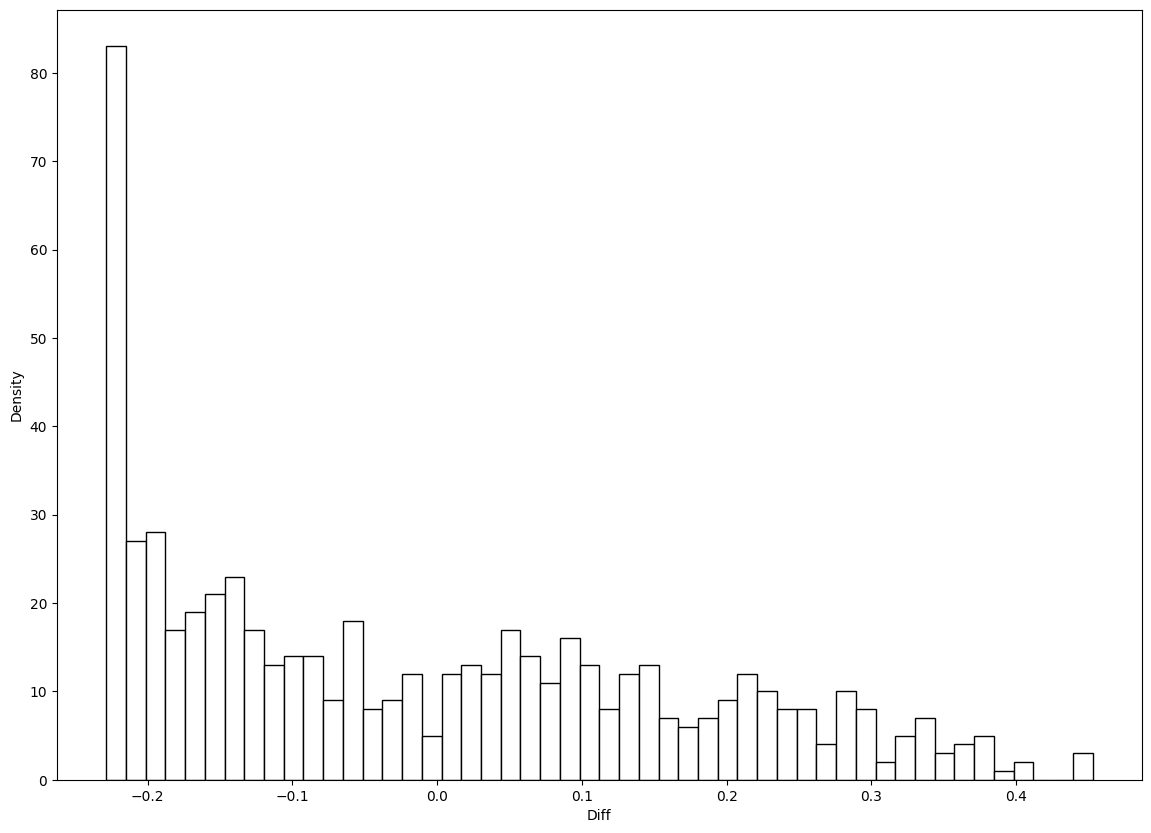

Mean Squared Error:       0.03205138200438595
Root Mean Squared Error:  0.17902899766346778
Mean Absolute Error:      0.15607690664677928
Mean Percent Error:       0.7401335749300688


In [128]:
y5_test_hat = NeuralNetwork(5, 60, 'sigmoid', 'adam', 100).predict(X_test)

y5_test_hat = np.squeeze(y5_test_hat)

CheckAccuracy_plots(y_test, y5_test_hat)
s = CheckAccuracy_dict(y_test, y5_test_hat)

In [129]:
deep_5_60_sig = CheckAccuracy_dict(y_test, y5_test_hat)
deep_5_60_sig.pop('diff')
deep_5_60_sig = {'DNN (5, 60, sig)': deep_5_60_sig}
deep_5_60_sig

Mean Squared Error:       0.03205138200438595
Root Mean Squared Error:  0.17902899766346778
Mean Absolute Error:      0.15607690664677928
Mean Percent Error:       0.7401335749300688


{'DNN (5, 60, sig)': {'mse': 0.03205138200438595,
  'rmse': 0.17902899766346778,
  'mae': 0.15607690664677928,
  'mpe': 0.7401335749300688}}

### Comparison of Key Accuracy Stats Across Neural Networks Using Varying Activation Functions

In [130]:
question2 = {**deep_5_60_relu, **deep_5_60_tanh, **deep_5_60_sig}

df = pd.DataFrame.from_dict(question2)
df

,"DNN (5, 60, Relu)","DNN (5, 60, tanh)","DNN (5, 60, sig)"
mse,0.000042,0.000420,0.032051
rmse,0.006492,0.020486,0.179029
mae,0.004398,0.015785,0.156077
mpe,0.026838,0.084692,0.740134


## Part A: Question 3

### DNN with 5 Layers of 10 Neurons Each (Activation: Relu, Nodes/Layer = 10)

Epoch 1/100
5/5 - 1s - loss: 0.6751 - val_loss: 0.6514 - 1s/epoch - 256ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6272 - val_loss: 0.6097 - 63ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.5900 - val_loss: 0.5807 - 41ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.5650 - val_loss: 0.5590 - 42ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.5419 - val_loss: 0.5332 - 41ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.5162 - val_loss: 0.5065 - 42ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.4891 - val_loss: 0.4779 - 65ms/epoch - 13ms/step
Epoch 8/100
5/5 - 0s - loss: 0.4600 - val_loss: 0.4470 - 59ms/epoch - 12ms/step
Epoch 9/100
5/5 - 0s - loss: 0.4286 - val_loss: 0.4140 - 60ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.3955 - val_loss: 0.3792 - 44ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.3592 - val_loss: 0.3398 - 45ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.3177 - val_loss: 0.2952 - 41ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.2732 - val_lo

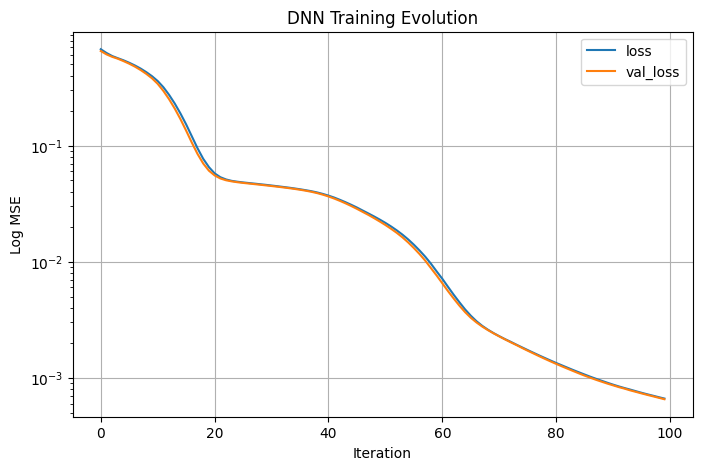

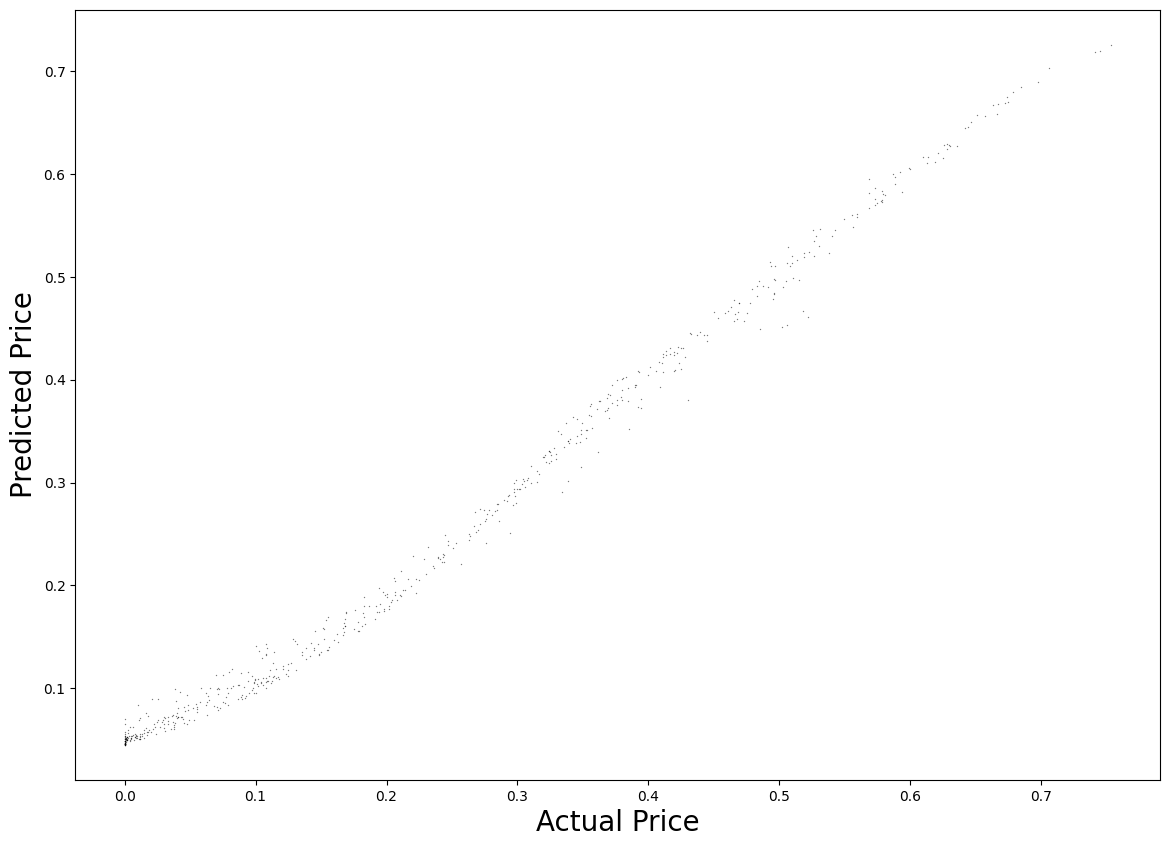

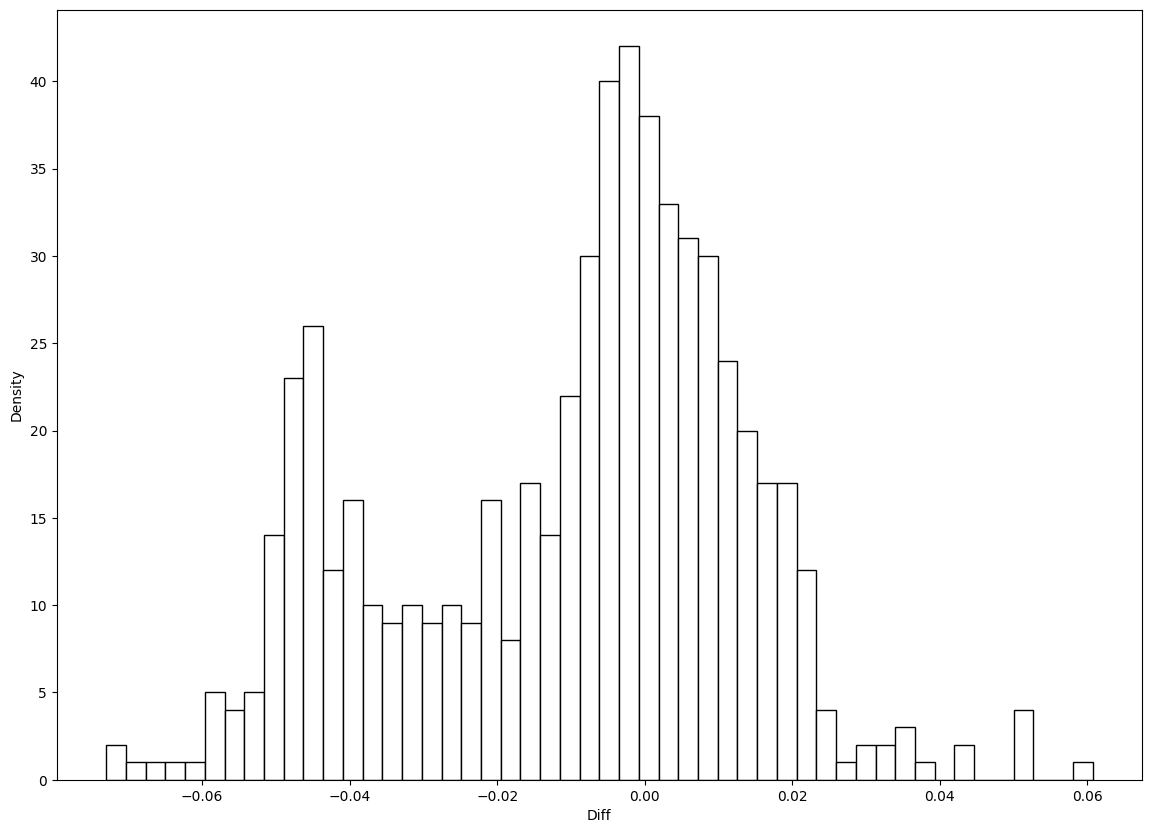

Mean Squared Error:       0.0006538356324692827
Root Mean Squared Error:  0.025570209863614392
Mean Absolute Error:      0.01907295410808334
Mean Percent Error:       0.10571120368804306


In [131]:
y6_test_hat = NeuralNetwork(5, 10, 'relu', 'adam', 100).predict(X_test)

y6_test_hat = np.squeeze(y6_test_hat)

CheckAccuracy_plots(y_test, y6_test_hat)
s = CheckAccuracy_dict(y_test, y6_test_hat)

In [132]:
deep_5_10_relu = CheckAccuracy_dict(y_test, y6_test_hat)
deep_5_10_relu.pop('diff')
deep_5_10_relu = {'DNN (5, 10, relu)': deep_5_10_relu}
deep_5_10_relu

Mean Squared Error:       0.0006538356324692827
Root Mean Squared Error:  0.025570209863614392
Mean Absolute Error:      0.01907295410808334
Mean Percent Error:       0.10571120368804306


{'DNN (5, 10, relu)': {'mse': 0.0006538356324692827,
  'rmse': 0.025570209863614392,
  'mae': 0.01907295410808334,
  'mpe': 0.10571120368804306}}

### DNN with 5 Layers of 50 Neurons Each (Activation: Relu, Nodes/Layer = 50)

Epoch 1/100
5/5 - 2s - loss: 0.4040 - val_loss: 0.2519 - 2s/epoch - 370ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1888 - val_loss: 0.1176 - 62ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0916 - val_loss: 0.0673 - 91ms/epoch - 18ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0620 - val_loss: 0.0587 - 80ms/epoch - 16ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0600 - val_loss: 0.0605 - 75ms/epoch - 15ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0623 - val_loss: 0.0615 - 86ms/epoch - 17ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0625 - val_loss: 0.0602 - 86ms/epoch - 17ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0604 - val_loss: 0.0572 - 86ms/epoch - 17ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0569 - val_loss: 0.0535 - 67ms/epoch - 13ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0530 - val_loss: 0.0502 - 65ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0496 - val_loss: 0.0472 - 56ms/epoch - 11ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0464 - val_loss: 0.0440 - 48ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0427 -

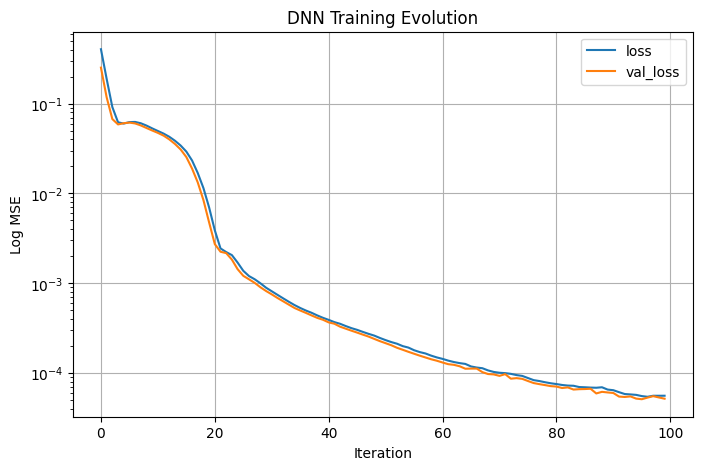

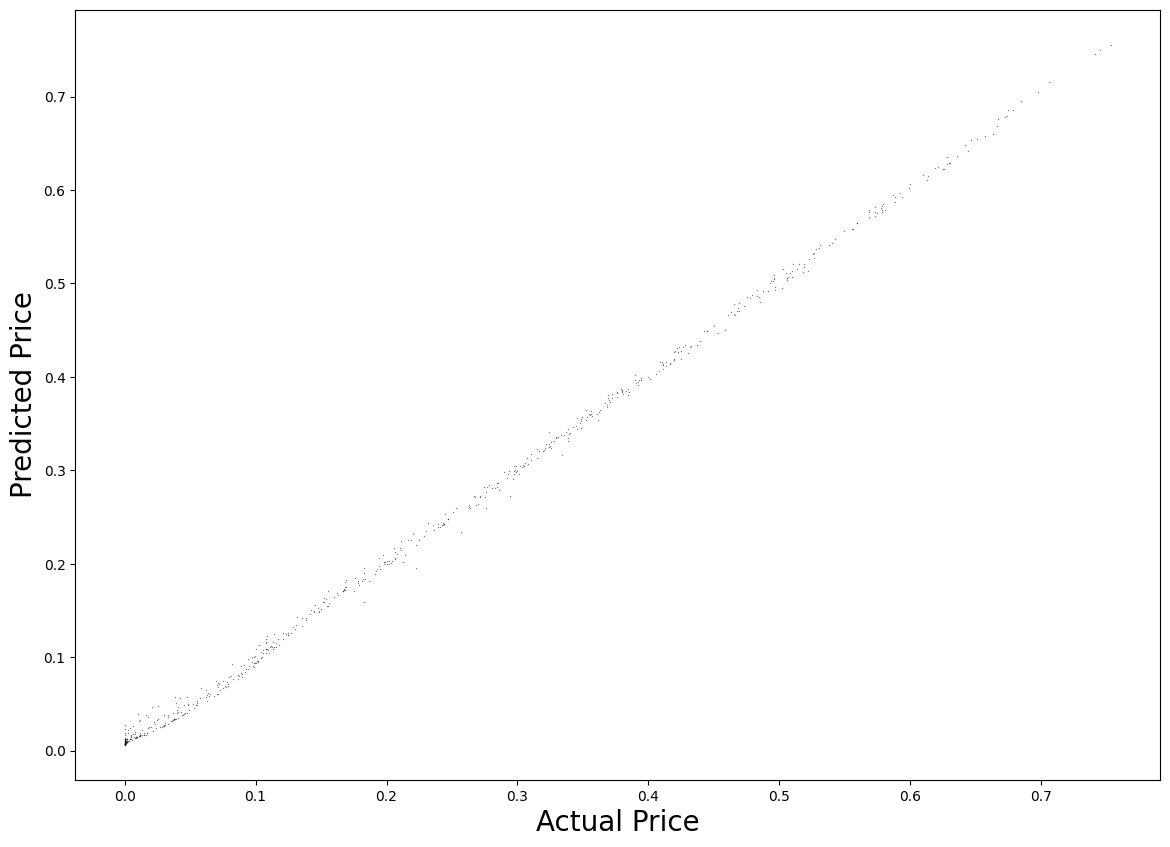

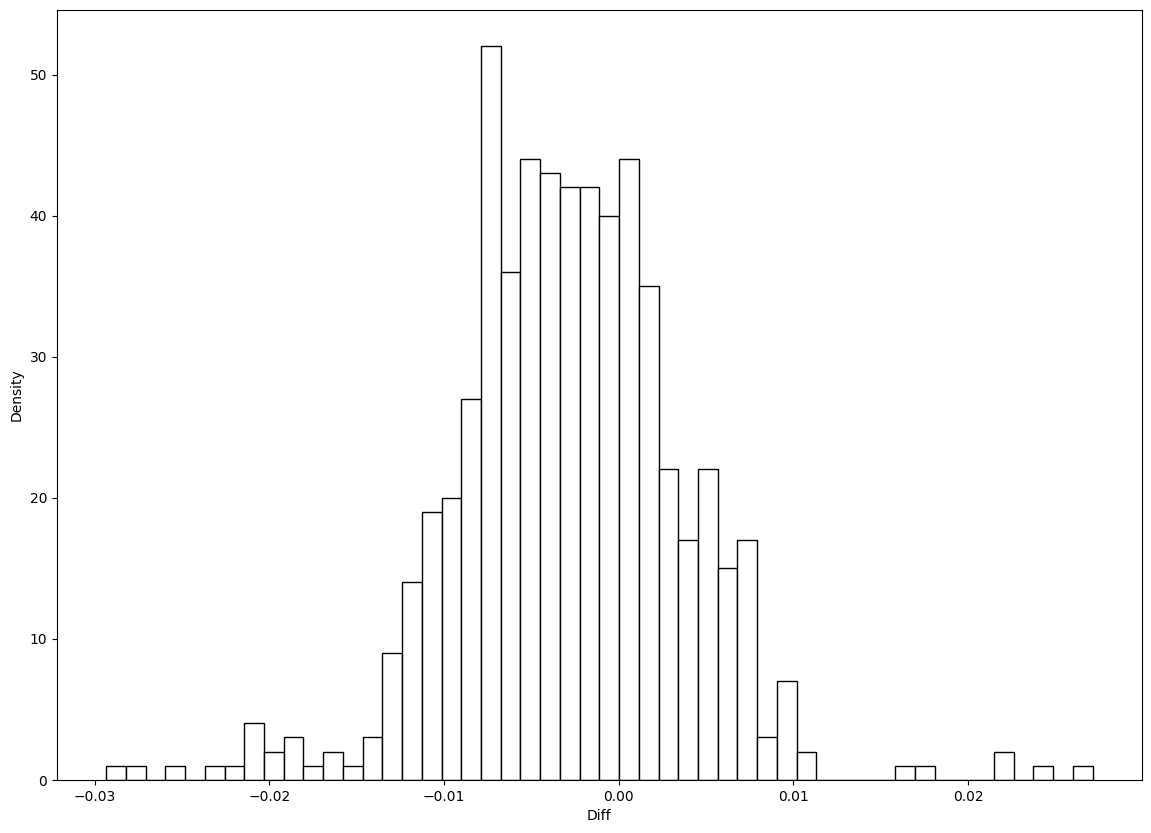

Mean Squared Error:       5.1551871101586556e-05
Root Mean Squared Error:  0.007179963168539694
Mean Absolute Error:      0.0055263177032673985
Mean Percent Error:       0.029683078591473882


In [133]:
y7_test_hat = NeuralNetwork(5, 50, 'relu', 'adam', 100).predict(X_test)

y7_test_hat = np.squeeze(y7_test_hat)

CheckAccuracy_plots(y_test, y7_test_hat)
s = CheckAccuracy_dict(y_test, y7_test_hat)

In [134]:
deep_5_50_relu = CheckAccuracy_dict(y_test, y7_test_hat)
deep_5_50_relu.pop('diff')
deep_5_50_relu = {'DNN (5, 50, relu)': deep_5_50_relu}
deep_5_50_relu

Mean Squared Error:       5.1551871101586556e-05
Root Mean Squared Error:  0.007179963168539694
Mean Absolute Error:      0.0055263177032673985
Mean Percent Error:       0.029683078591473882


{'DNN (5, 50, relu)': {'mse': 5.1551871101586556e-05,
  'rmse': 0.007179963168539694,
  'mae': 0.0055263177032673985,
  'mpe': 0.029683078591473882}}

### DNN with 5 Layers of 100 Neurons Each (Activation: Relu, Nodes/Layer = 100)

Epoch 1/100
5/5 - 1s - loss: 0.4415 - val_loss: 0.2575 - 1s/epoch - 272ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1678 - val_loss: 0.0729 - 97ms/epoch - 19ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0593 - val_loss: 0.0581 - 65ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0644 - val_loss: 0.0686 - 68ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0712 - val_loss: 0.0681 - 61ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0674 - val_loss: 0.0599 - 63ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0571 - val_loss: 0.0494 - 74ms/epoch - 15ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0479 - val_loss: 0.0460 - 64ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0455 - val_loss: 0.0435 - 61ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0406 - val_loss: 0.0370 - 61ms/epoch - 12ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0358 - val_loss: 0.0326 - 59ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0307 - val_loss: 0.0265 - 74ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0243 -

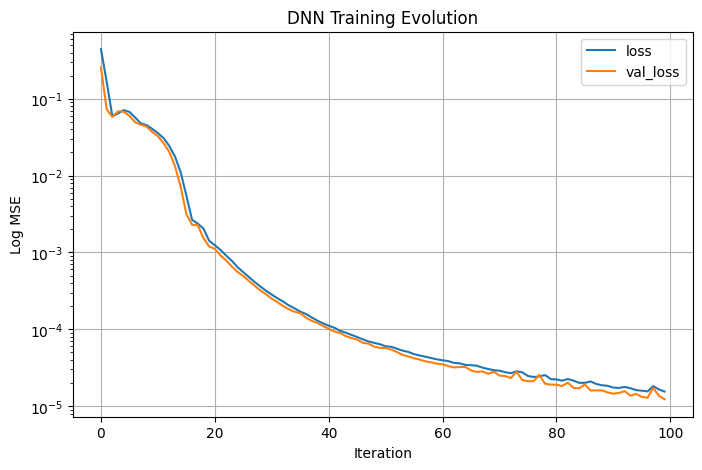

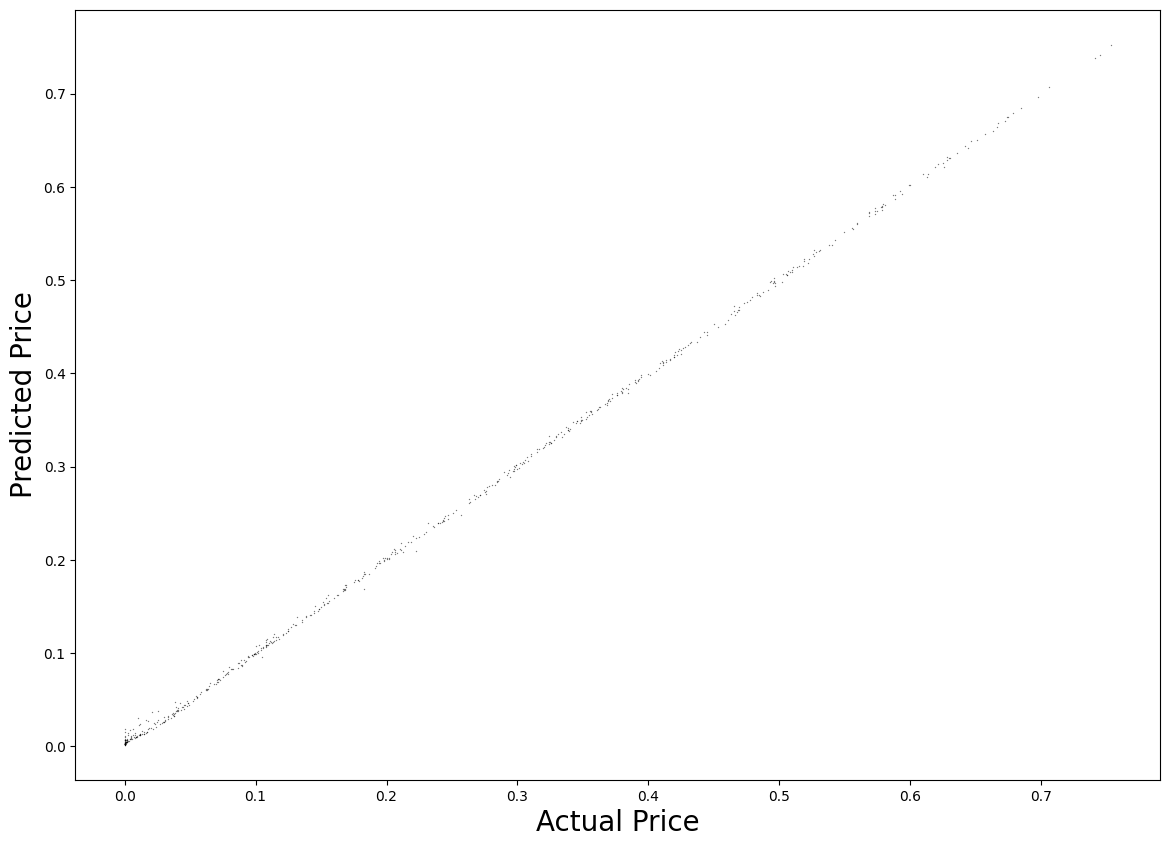

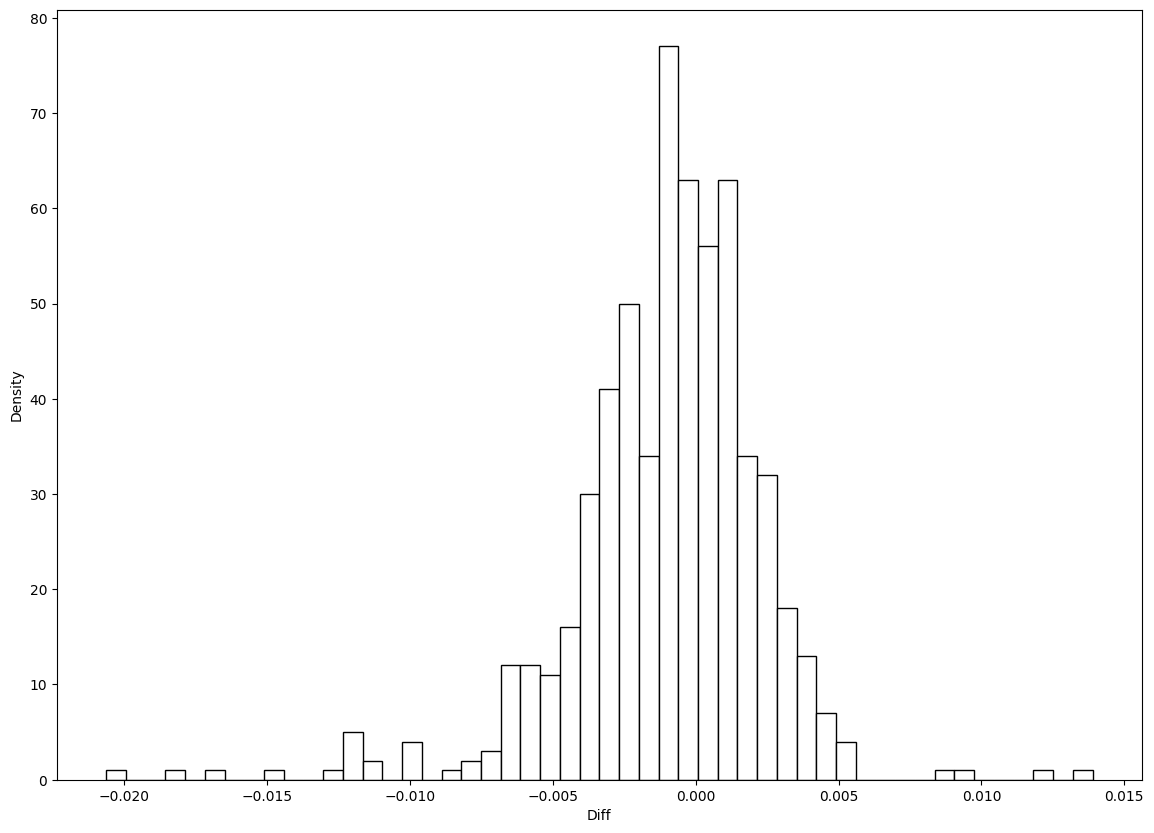

Mean Squared Error:       1.2292794726190613e-05
Root Mean Squared Error:  0.003506108202293622
Mean Absolute Error:      0.002422969161133309
Mean Percent Error:       0.014494793758121691


{'diff': array([-1.13064707e-03,  1.96688823e-04, -3.77399204e-03,  1.15163662e-03,
        -9.48317992e-04, -1.64721314e-05, -3.84070121e-03, -4.19035883e-04,
        -1.39727920e-03,  5.62932474e-05, -3.37665927e-03,  1.66922404e-03,
        -2.51655580e-03, -1.73021326e-03, -3.28061425e-04, -2.06082570e-03,
         7.45908701e-04, -2.54592233e-03,  2.98056821e-03, -4.31405389e-03,
         1.15479557e-03,  2.92774870e-03, -5.31456344e-03, -1.71493866e-03,
         3.93996361e-03,  1.50809588e-05,  2.42517594e-03, -1.54084281e-03,
         1.34147260e-03,  1.84794178e-03,  2.15931494e-03,  1.79342055e-03,
        -3.53248417e-03,  3.13655066e-03, -2.51126906e-03, -2.48597452e-03,
        -2.66813598e-03,  1.95054610e-03, -2.34407589e-03,  3.54151306e-03,
        -2.56651977e-03,  1.27589799e-04,  2.73575729e-04, -1.30247873e-03,
         2.20189738e-03,  4.27527127e-04, -3.07206299e-03, -1.98658158e-03,
         2.36973193e-04, -2.54559869e-03, -2.58030249e-03, -1.35981827e-04,
    

In [135]:
y8_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 100).predict(X_test)

y8_test_hat = np.squeeze(y8_test_hat)

CheckAccuracy_plots(y_test, y8_test_hat)
CheckAccuracy_dict(y_test, y8_test_hat)

In [174]:
deep_5_100_relu = CheckAccuracy_dict(y_test, y8_test_hat)
deep_5_100_relu.pop('diff')
deep_5_100_relu = {'DNN (5, 100, relu, adam, 100 epochs)': deep_5_100_relu}
deep_5_100_relu

Mean Squared Error:       1.2292794726190613e-05
Root Mean Squared Error:  0.003506108202293622
Mean Absolute Error:      0.002422969161133309
Mean Percent Error:       0.014494793758121691


{'DNN (5, 100, relu, adam, 100 epochs)': {'mse': 1.2292794726190613e-05,
  'rmse': 0.003506108202293622,
  'mae': 0.002422969161133309,
  'mpe': 0.014494793758121691}}

### Comparison of Key Accuracy Stats for Neural Networks Using Varying Number of Nodes Per Layer

In [172]:
question3 = {**deep_5_10_relu, **deep_5_50_relu, **deep_5_60_relu}
question3 = {**question3, **deep_5_100_relu}

df = pd.DataFrame.from_dict(question3)
df

,"DNN (5, 10, relu)","DNN (5, 50, relu)","DNN (5, 60, Relu)","DNN (5, 100, relu, adam, 100)"
mse,0.000654,0.000052,0.000042,0.000012
rmse,0.025570,0.007180,0.006492,0.003506
mae,0.019073,0.005526,0.004398,0.002423
mpe,0.105711,0.029683,0.026838,0.014495


## Part A: Question 4

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 100, rmsprop)

Epoch 1/100
5/5 - 1s - loss: 0.3613 - val_loss: 0.1024 - 1s/epoch - 220ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0715 - val_loss: 0.0519 - 72ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0501 - val_loss: 0.0477 - 86ms/epoch - 17ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0469 - val_loss: 0.0447 - 74ms/epoch - 15ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0440 - val_loss: 0.0416 - 74ms/epoch - 15ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0404 - val_loss: 0.0375 - 73ms/epoch - 15ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0358 - val_loss: 0.0320 - 70ms/epoch - 14ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0295 - val_loss: 0.0238 - 76ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0211 - val_loss: 0.0265 - 86ms/epoch - 17ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0175 - val_loss: 0.0156 - 74ms/epoch - 15ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0116 - val_loss: 0.0088 - 83ms/epoch - 17ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0104 - val_loss: 0.0081 - 77ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0060 -

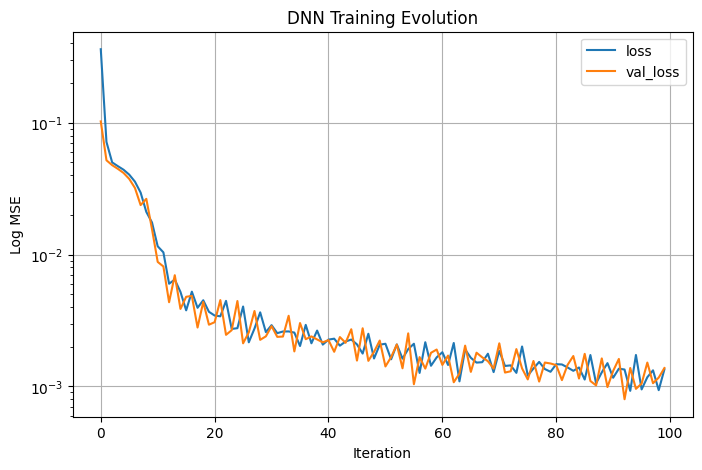

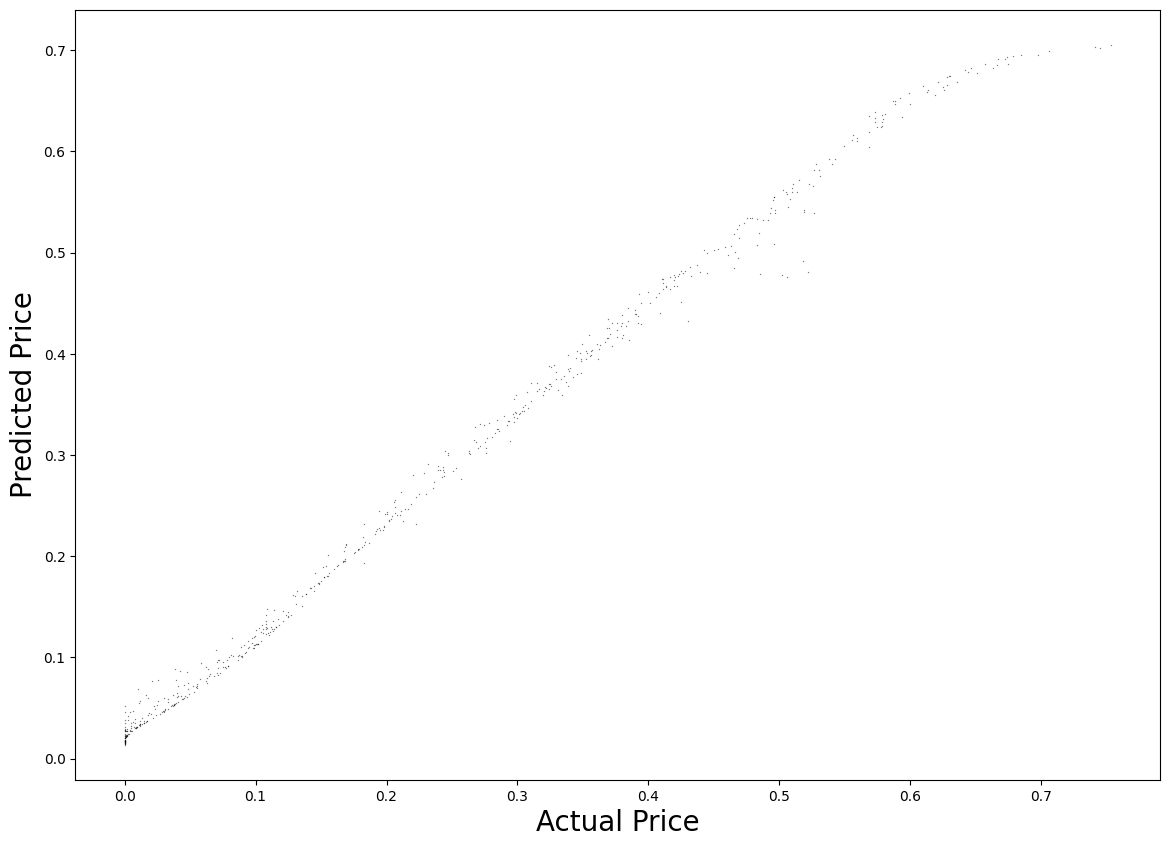

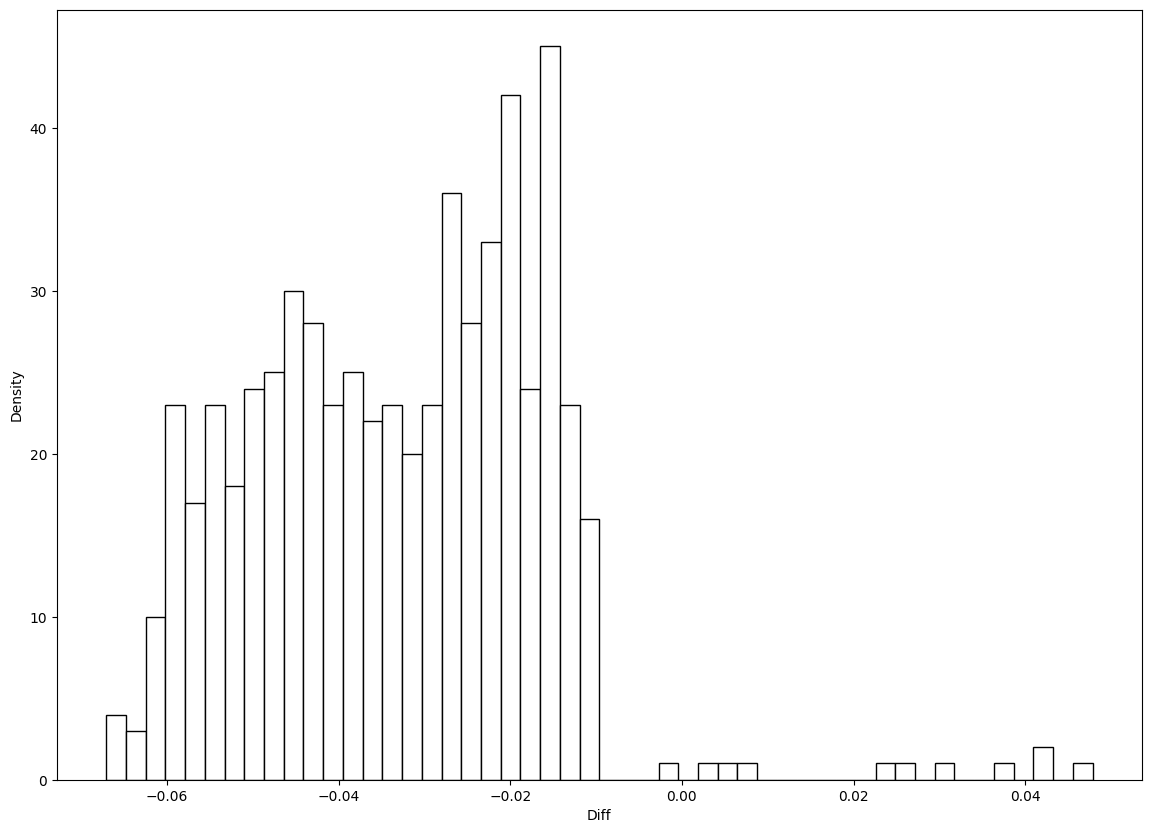

Mean Squared Error:       0.0013797059027470936
Root Mean Squared Error:  0.037144392615132284
Mean Absolute Error:      0.033994798075871184
Mean Percent Error:       0.1535606658901259


In [161]:
y9_test_hat = NeuralNetwork(5, 100, 'relu', 'rmsprop', 100).predict(X_test)

y9_test_hat = np.squeeze(y9_test_hat)

CheckAccuracy_plots(y_test, y9_test_hat)
s = CheckAccuracy_dict(y_test, y9_test_hat)

In [162]:
deep_5_100_relu_rms = CheckAccuracy_dict(y_test, y9_test_hat)
deep_5_100_relu_rms.pop('diff')
deep_5_100_relu_rms = {'DNN (5, 100, relu, rms)': deep_5_100_relu_rms}
deep_5_100_relu_rms

Mean Squared Error:       0.0013797059027470936
Root Mean Squared Error:  0.037144392615132284
Mean Absolute Error:      0.033994798075871184
Mean Percent Error:       0.1535606658901259


{'DNN (5, 100, relu, rms)': {'mse': 0.0013797059027470936,
  'rmse': 0.037144392615132284,
  'mae': 0.033994798075871184,
  'mpe': 0.1535606658901259}}

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 100, sgd)

Epoch 1/100
5/5 - 1s - loss: 0.4519 - val_loss: 0.3363 - 896ms/epoch - 179ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2885 - val_loss: 0.2374 - 88ms/epoch - 18ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2100 - val_loss: 0.1824 - 69ms/epoch - 14ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1641 - val_loss: 0.1472 - 80ms/epoch - 16ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1341 - val_loss: 0.1232 - 70ms/epoch - 14ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1133 - val_loss: 0.1059 - 65ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0983 - val_loss: 0.0932 - 95ms/epoch - 19ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0871 - val_loss: 0.0836 - 65ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0787 - val_loss: 0.0763 - 81ms/epoch - 16ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0723 - val_loss: 0.0706 - 114ms/epoch - 23ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0673 - val_loss: 0.0661 - 141ms/epoch - 28ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0633 - val_loss: 0.0625 - 116ms/epoch - 23ms/step
Epoch 13/100
5/5 - 0s - loss: 0.

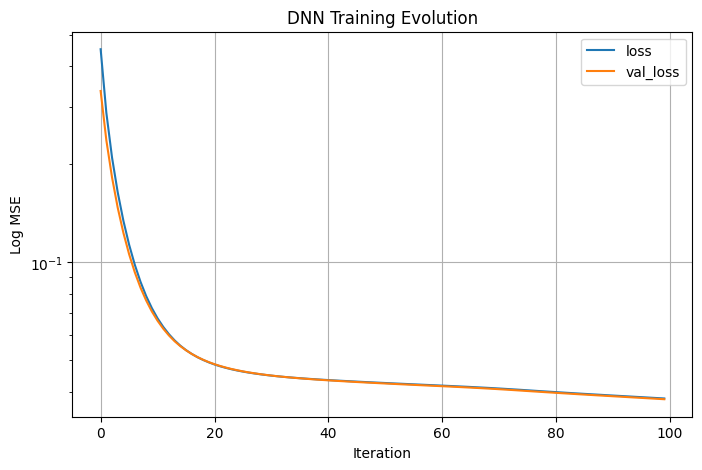

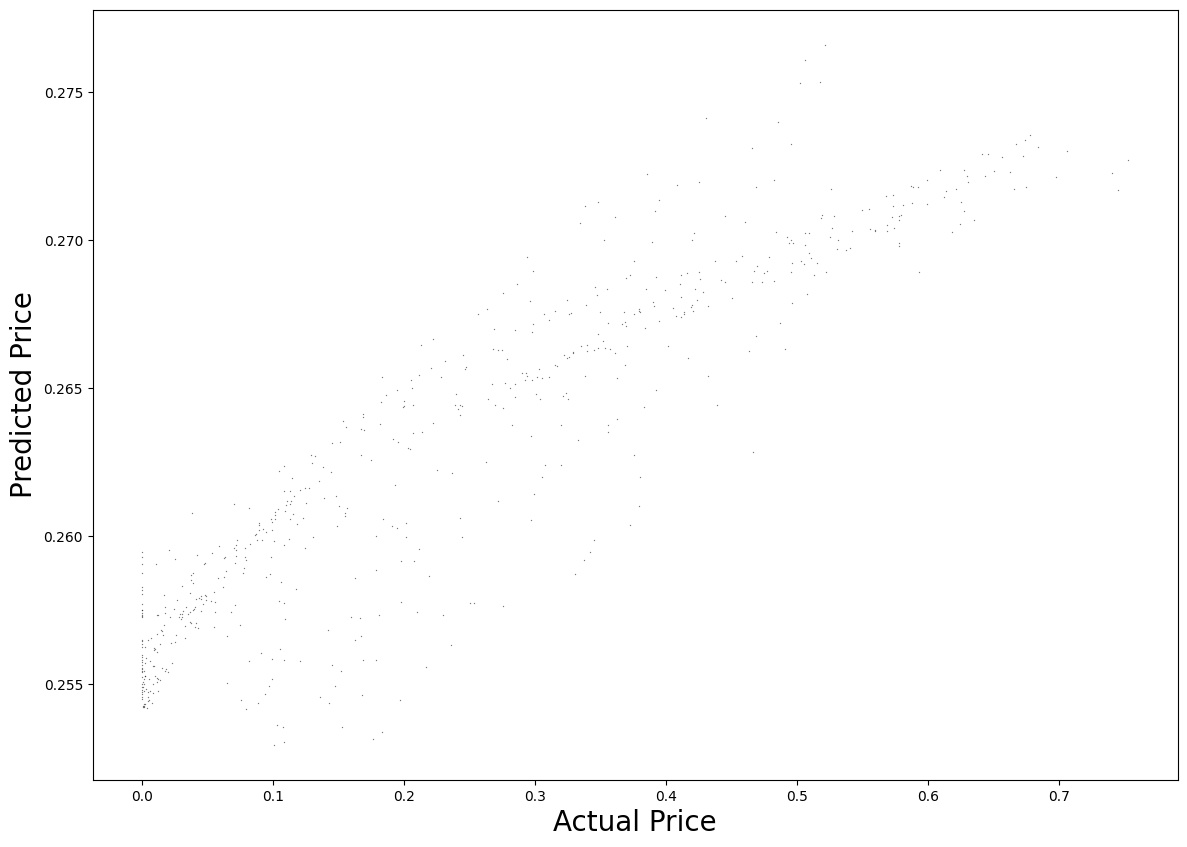

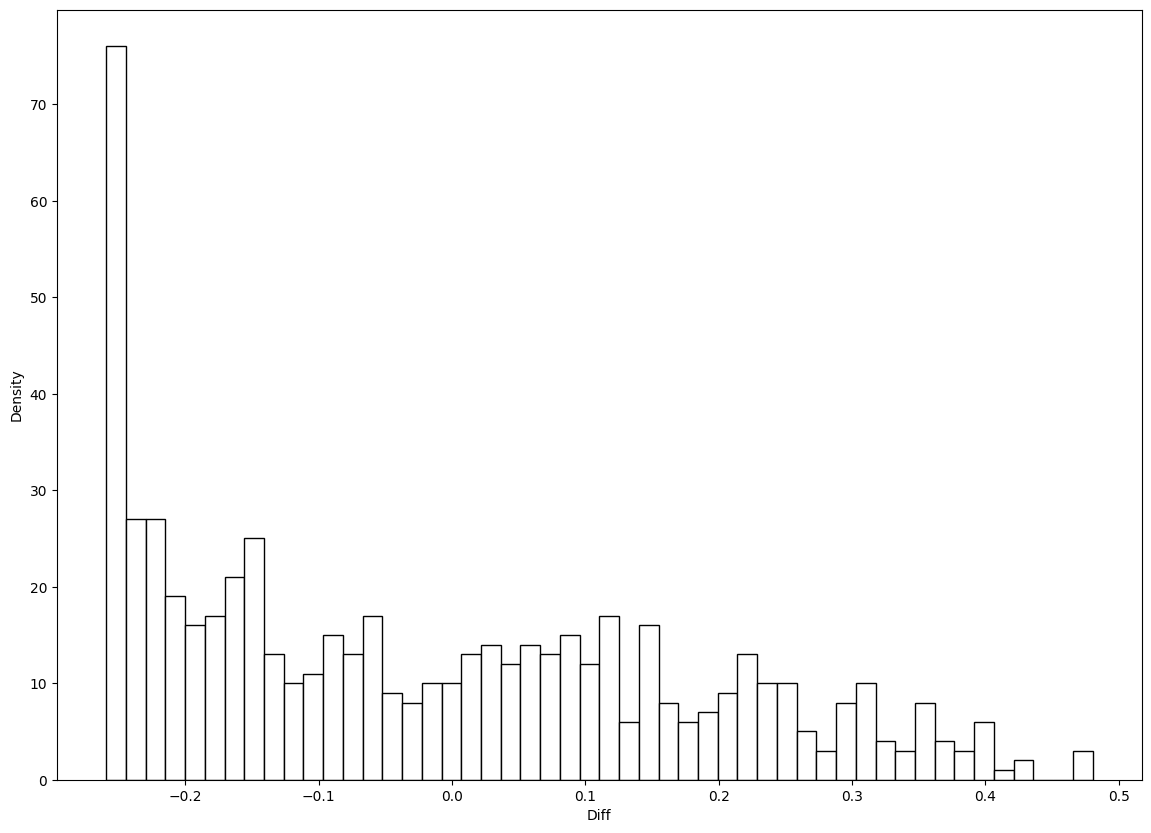

Mean Squared Error:       0.03795499636637683
Root Mean Squared Error:  0.19482042081459744
Mean Absolute Error:      0.1695958608131143
Mean Percent Error:       0.805417761417273


In [163]:
y10_test_hat = NeuralNetwork(5, 100, 'relu', 'sgd', 100).predict(X_test)

y10_test_hat = np.squeeze(y10_test_hat)

CheckAccuracy_plots(y_test, y10_test_hat)
s = CheckAccuracy_dict(y_test, y10_test_hat)

In [164]:
deep_5_100_relu_sgd = CheckAccuracy_dict(y_test, y10_test_hat)
deep_5_100_relu_sgd.pop('diff')
deep_5_100_relu_sgd = {'DNN (5, 100, relu, sgd)': deep_5_100_relu_sgd}
deep_5_100_relu_sgd

Mean Squared Error:       0.03795499636637683
Root Mean Squared Error:  0.19482042081459744
Mean Absolute Error:      0.1695958608131143
Mean Percent Error:       0.805417761417273


{'DNN (5, 100, relu, sgd)': {'mse': 0.03795499636637683,
  'rmse': 0.19482042081459744,
  'mae': 0.1695958608131143,
  'mpe': 0.805417761417273}}

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

In [165]:
question4 = {**deep_5_100_relu, **deep_5_100_relu_rms, **deep_5_100_relu_sgd}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 100, relu, adam)","DNN (5, 100, relu, rms)","DNN (5, 100, relu, sgd)"
mse,0.000012,0.001380,0.037955
rmse,0.003506,0.037144,0.194820
mae,0.002423,0.033995,0.169596
mpe,0.014495,0.153561,0.805418


## Part A: Question 5

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

Epoch 1/500
5/5 - 1s - loss: 0.3924 - val_loss: 0.1785 - 1s/epoch - 297ms/step
Epoch 2/500
5/5 - 0s - loss: 0.1151 - val_loss: 0.0598 - 75ms/epoch - 15ms/step
Epoch 3/500
5/5 - 0s - loss: 0.0594 - val_loss: 0.0637 - 88ms/epoch - 18ms/step
Epoch 4/500
5/5 - 0s - loss: 0.0692 - val_loss: 0.0708 - 98ms/epoch - 20ms/step
Epoch 5/500
5/5 - 0s - loss: 0.0727 - val_loss: 0.0688 - 79ms/epoch - 16ms/step
Epoch 6/500
5/5 - 0s - loss: 0.0682 - val_loss: 0.0611 - 78ms/epoch - 16ms/step
Epoch 7/500
5/5 - 0s - loss: 0.0586 - val_loss: 0.0517 - 80ms/epoch - 16ms/step
Epoch 8/500
5/5 - 0s - loss: 0.0503 - val_loss: 0.0471 - 81ms/epoch - 16ms/step
Epoch 9/500
5/5 - 0s - loss: 0.0464 - val_loss: 0.0449 - 78ms/epoch - 16ms/step
Epoch 10/500
5/5 - 0s - loss: 0.0424 - val_loss: 0.0378 - 87ms/epoch - 17ms/step
Epoch 11/500
5/5 - 0s - loss: 0.0359 - val_loss: 0.0315 - 78ms/epoch - 16ms/step
Epoch 12/500
5/5 - 0s - loss: 0.0286 - val_loss: 0.0224 - 85ms/epoch - 17ms/step
Epoch 13/500
5/5 - 0s - loss: 0.0193 -

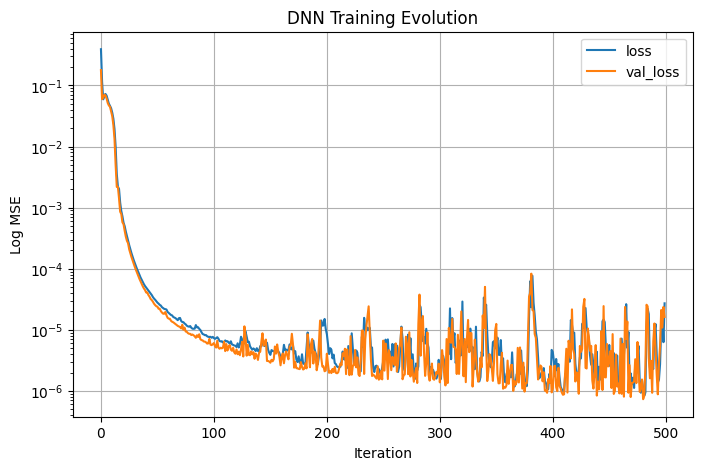

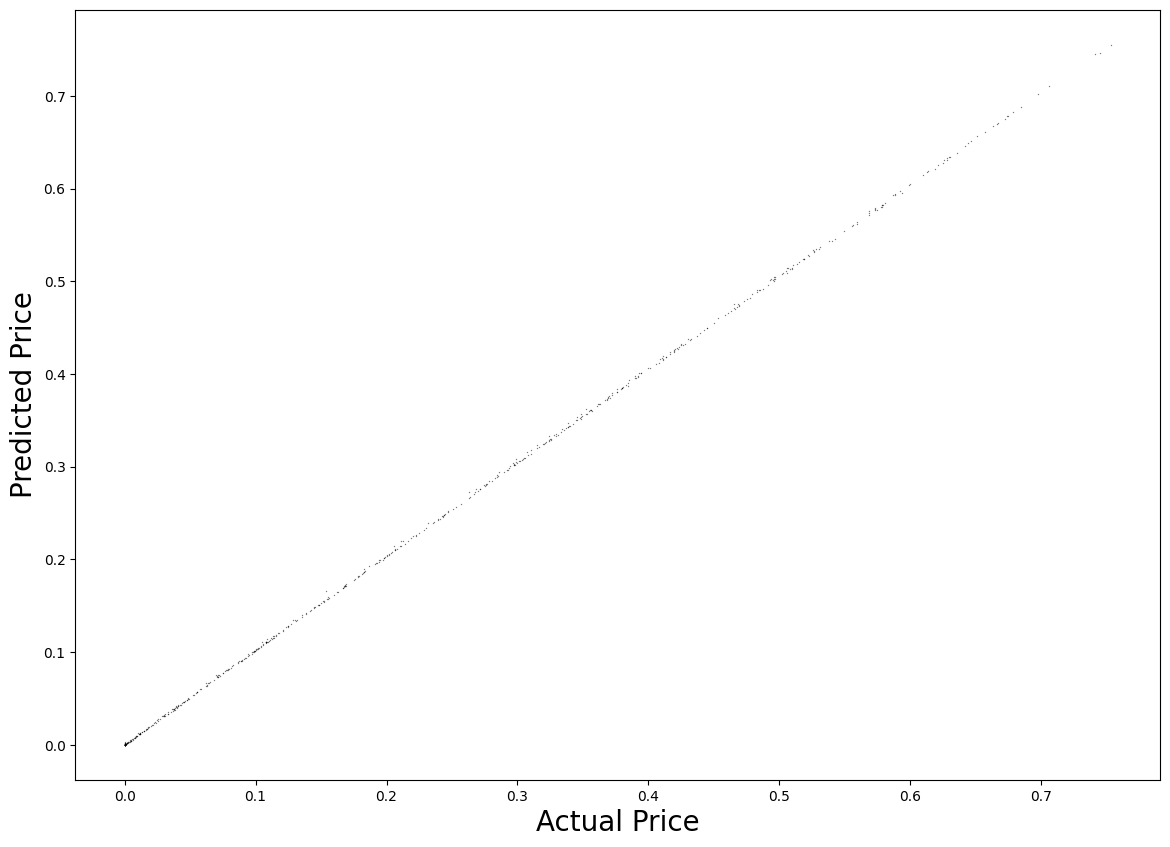

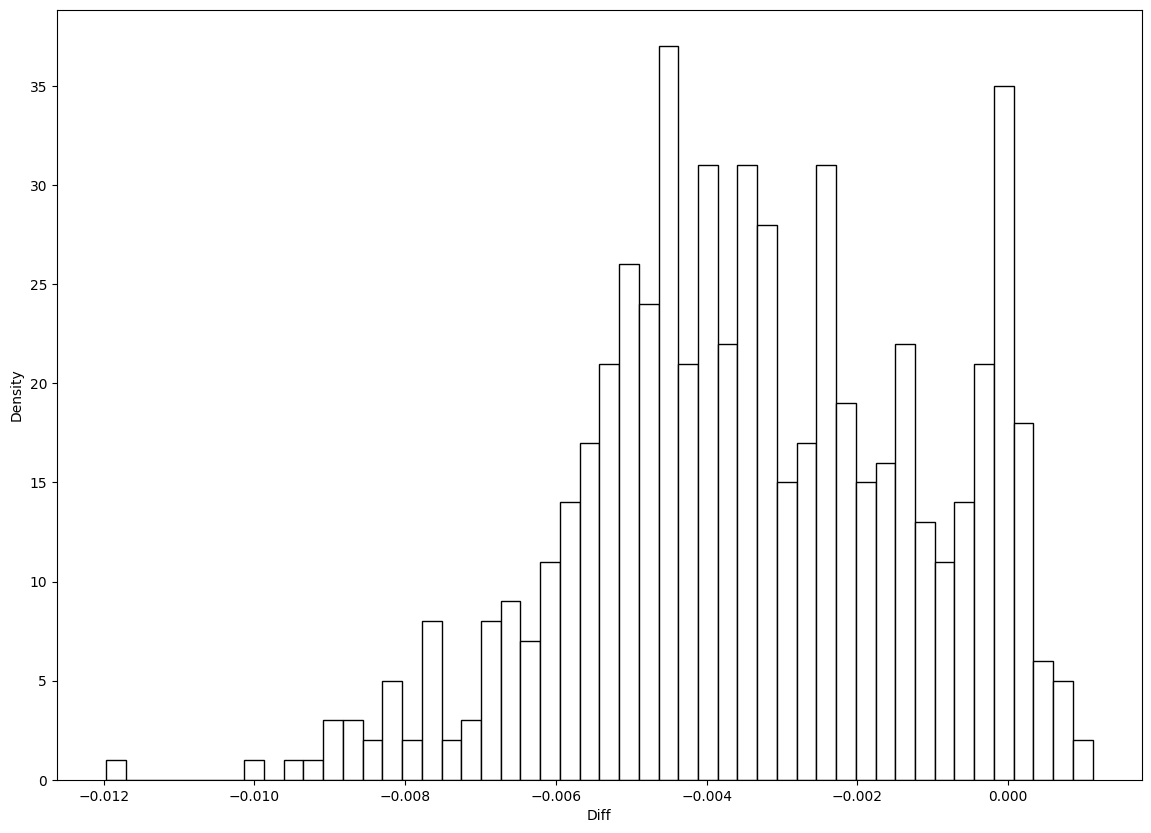

Mean Squared Error:       1.625361291434068e-05
Root Mean Squared Error:  0.004031576976115015
Mean Absolute Error:      0.0033743260466446087
Mean Percent Error:       0.016667162967346775


In [166]:
y11_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 500).predict(X_test)

y11_test_hat = np.squeeze(y11_test_hat)

CheckAccuracy_plots(y_test, y11_test_hat)
s = CheckAccuracy_dict(y_test, y11_test_hat)

In [167]:
deep_5_100_relu_adam_500 = CheckAccuracy_dict(y_test, y11_test_hat)
deep_5_100_relu_adam_500.pop('diff')
deep_5_100_relu_adam_500 = {'DNN (5, 100, relu, adam, 500 epochs)': deep_5_100_relu_adam_500}
deep_5_100_relu_adam_500

Mean Squared Error:       1.625361291434068e-05
Root Mean Squared Error:  0.004031576976115015
Mean Absolute Error:      0.0033743260466446087
Mean Percent Error:       0.016667162967346775


{'DNN (5, 100, relu, adam, 500 epochs)': {'mse': 1.625361291434068e-05,
  'rmse': 0.004031576976115015,
  'mae': 0.0033743260466446087,
  'mpe': 0.016667162967346775}}

Epoch 1/1000
5/5 - 2s - loss: 0.5108 - val_loss: 0.3477 - 2s/epoch - 363ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.2513 - val_loss: 0.1249 - 72ms/epoch - 14ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.0844 - val_loss: 0.0532 - 73ms/epoch - 15ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.0557 - val_loss: 0.0617 - 89ms/epoch - 18ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0664 - val_loss: 0.0670 - 85ms/epoch - 17ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0683 - val_loss: 0.0637 - 78ms/epoch - 16ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0626 - val_loss: 0.0549 - 91ms/epoch - 18ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0528 - val_loss: 0.0455 - 69ms/epoch - 14ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0436 - val_loss: 0.0405 - 77ms/epoch - 15ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0393 - val_loss: 0.0367 - 81ms/epoch - 16ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0342 - val_loss: 0.0301 - 87ms/epoch - 17ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0280 - val_loss: 0.0239 - 67ms/epoch - 13ms/step
Epoch 13/1000
5/5 - 0s - l

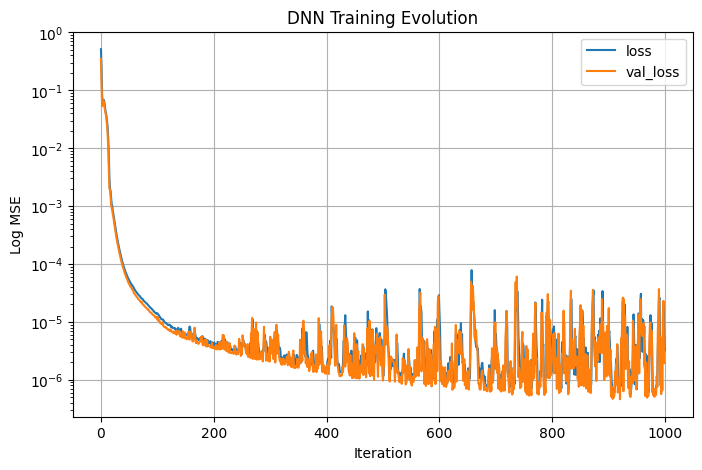

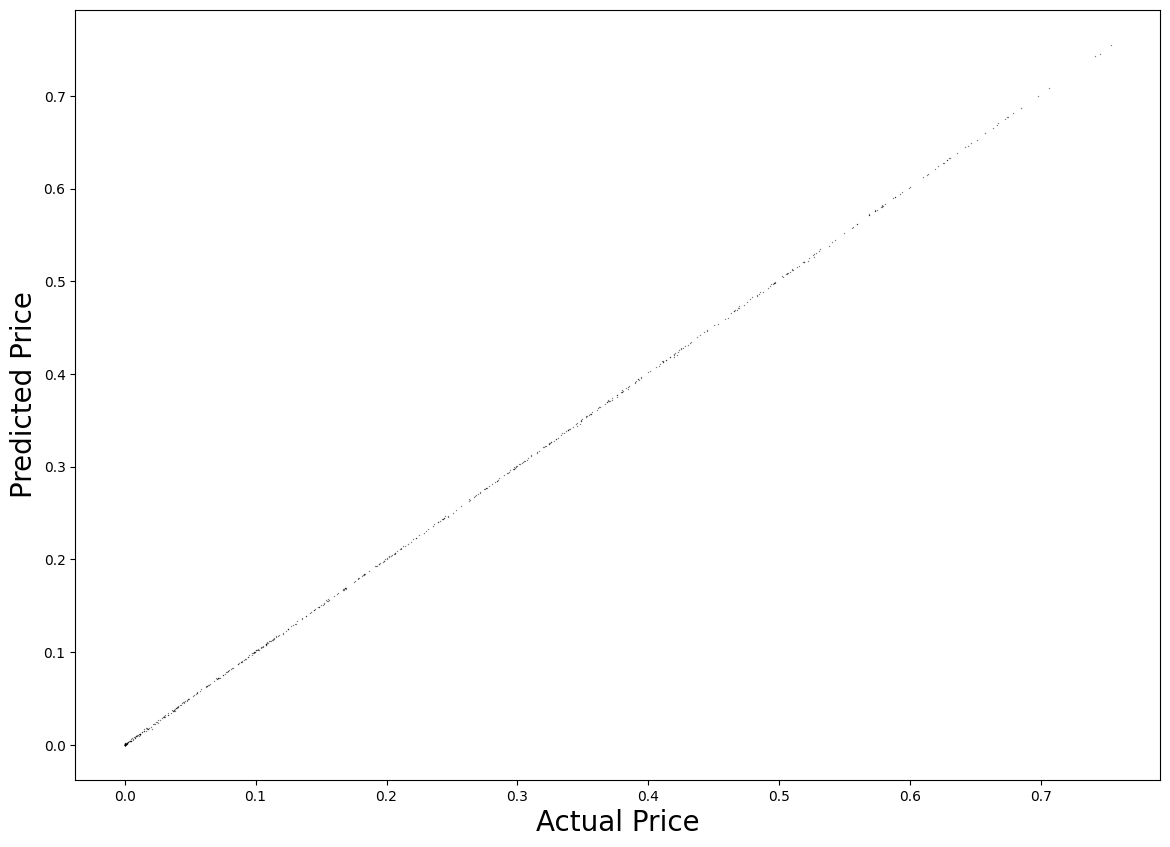

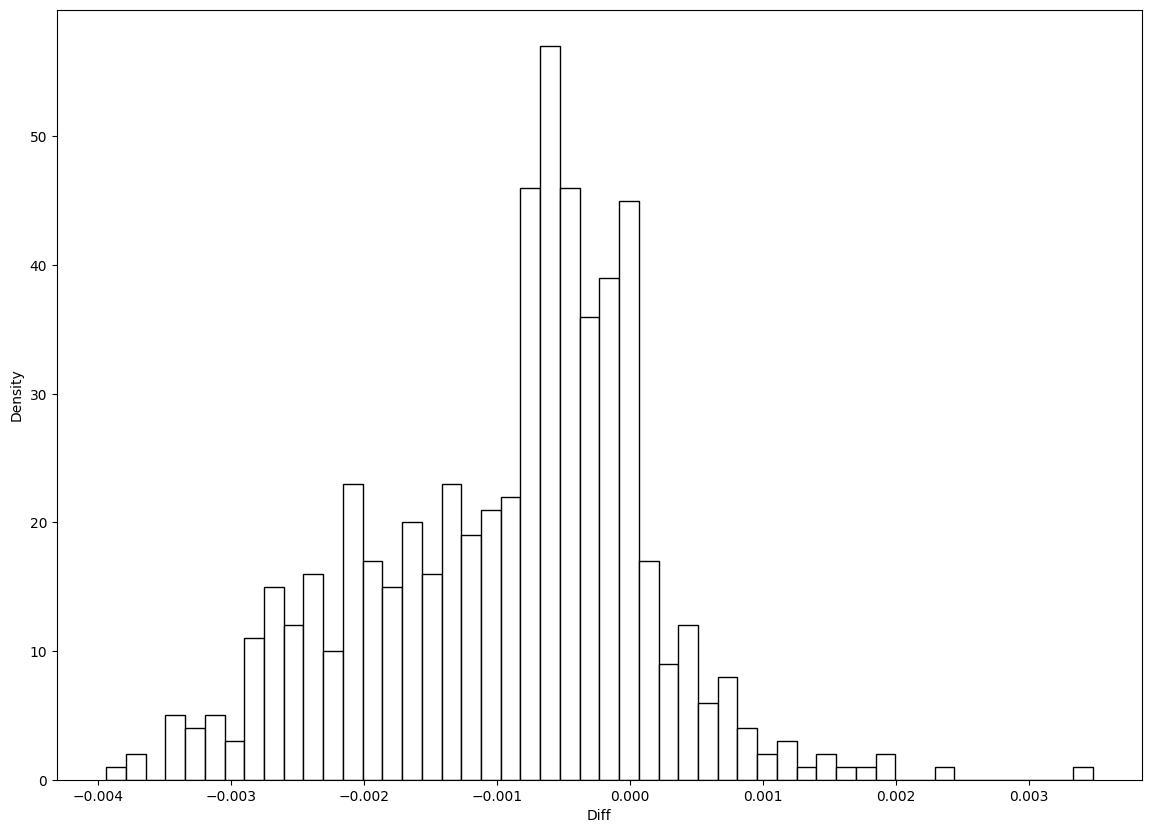

Mean Squared Error:       1.940852101389479e-06
Root Mean Squared Error:  0.0013931446807096091
Mean Absolute Error:      0.0010735905416679708
Mean Percent Error:       0.005759475651350411


In [168]:
y12_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 1000).predict(X_test)

y12_test_hat = np.squeeze(y12_test_hat)

CheckAccuracy_plots(y_test, y12_test_hat)
s = CheckAccuracy_dict(y_test, y12_test_hat)

In [169]:
deep_5_100_relu_adam_1000 = CheckAccuracy_dict(y_test, y12_test_hat)
deep_5_100_relu_adam_1000.pop('diff')
deep_5_100_relu_adam_1000 = {'DNN (5, 100, relu, adam, 1000 epochs)': deep_5_100_relu_adam_1000}
deep_5_100_relu_adam_1000

Mean Squared Error:       1.940852101389479e-06
Root Mean Squared Error:  0.0013931446807096091
Mean Absolute Error:      0.0010735905416679708
Mean Percent Error:       0.005759475651350411


{'DNN (5, 100, relu, adam, 1000 epochs)': {'mse': 1.940852101389479e-06,
  'rmse': 0.0013931446807096091,
  'mae': 0.0010735905416679708,
  'mpe': 0.005759475651350411}}

### Comparison of Key Accuracy Stats for Neural Networks Running Varying Epochs

In [175]:
question4 = {**deep_5_100_relu, **deep_5_100_relu_adam_500, **deep_5_100_relu_adam_1000}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 100, relu, adam, 100 epochs)","DNN (5, 100, relu, adam, 500 epochs)","DNN (5, 100, relu, adam, 1000 epochs)"
mse,0.000012,0.000016,0.000002
rmse,0.003506,0.004032,0.001393
mae,0.002423,0.003374,0.001074
mpe,0.014495,0.016667,0.005759
